# Findings and Observations
1) Needed to create a model which would predict the Minimum and Maximum temperature for the next day
2) Data had a lot of Null values across and as the data was large dropped all the Null values
3) Observed that there was a Date column got it converted into Date type and made it the index
4) There were outliers in the data and was fixed by using the cuberoot method
5) The LDAPS_TmaxLapse column had a high positive correlation with target and also a high correlation with other columns. Inorder to avoid the biasness and multicollinearity got it deleted
6) The best model selected for analysis was RandomForest Model and it gave 91% accuracy for Minimum temperature prediction and 88% for Maximum temperature after hyperparameter tuning
7) Overall the data had lot of updates and findings to be done and the features were having mostly a positive relationship with the label

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
#checking the columns of dataset
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [6]:
#checking thev types of column
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
#checking the null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df = df.dropna()

In [9]:
#checking the null values
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
df.shape

(7588, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64
 17  

<Axes: >

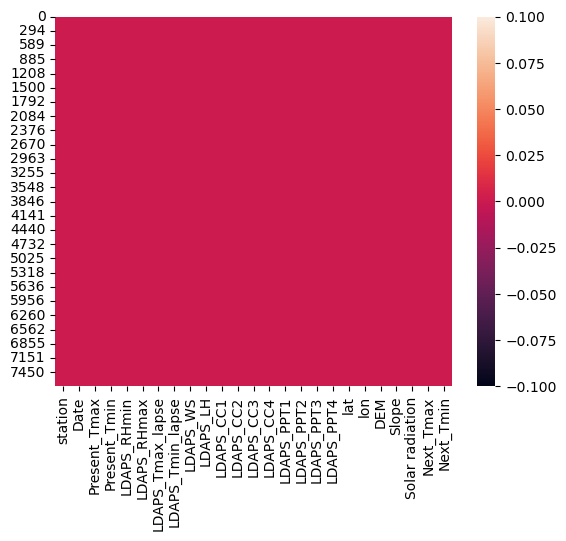

In [12]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [13]:
#Converting the datatype of Date column from object to datetime
df['Date'] = pd.to_datetime(df.Date, format = '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 non-nu

In [14]:
#Setting Date as DataFrame index
df.set_index('Date', inplace=True)

In [15]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

In [16]:
#Checking number of unique values in each column
df.nunique().to_frame('No of unique values')

No of unique values
station                            25
Present_Tmax                      167
Present_Tmin                      155
LDAPS_RHmin                      7585
LDAPS_RHmax                      7577
LDAPS_Tmax_lapse                 7588
LDAPS_Tmin_lapse                 7588
LDAPS_WS                         7588
LDAPS_LH                         7588
LDAPS_CC1                        7485
LDAPS_CC2                        7496
LDAPS_CC3                        7512
LDAPS_CC4                        7438
LDAPS_PPT1                       2779
LDAPS_PPT2                       2479
LDAPS_PPT3                       2326
LDAPS_PPT4                       1892
lat                                12
lon                                25
DEM                                25
Slope                              25
Solar radiation                  1575
Next_Tmax                         181
Next_Tmin                         157

In [17]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64


Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64


Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64


LDAPS_RHmin
77.030350    2
51.810596    2
71.658089    2
58.255688    1
46.582764    1
            ..
58.950947    1
58.566174    1
59.790348    1
51.062355    1
22.933014    1
Name: count, Length: 7585, dtype: int64


LDAPS_RHmax
92.531029    2
88.876610    2
85.863731    2
96.525200    2
9

In [18]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [19]:
#Stastical summary of numerical column
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

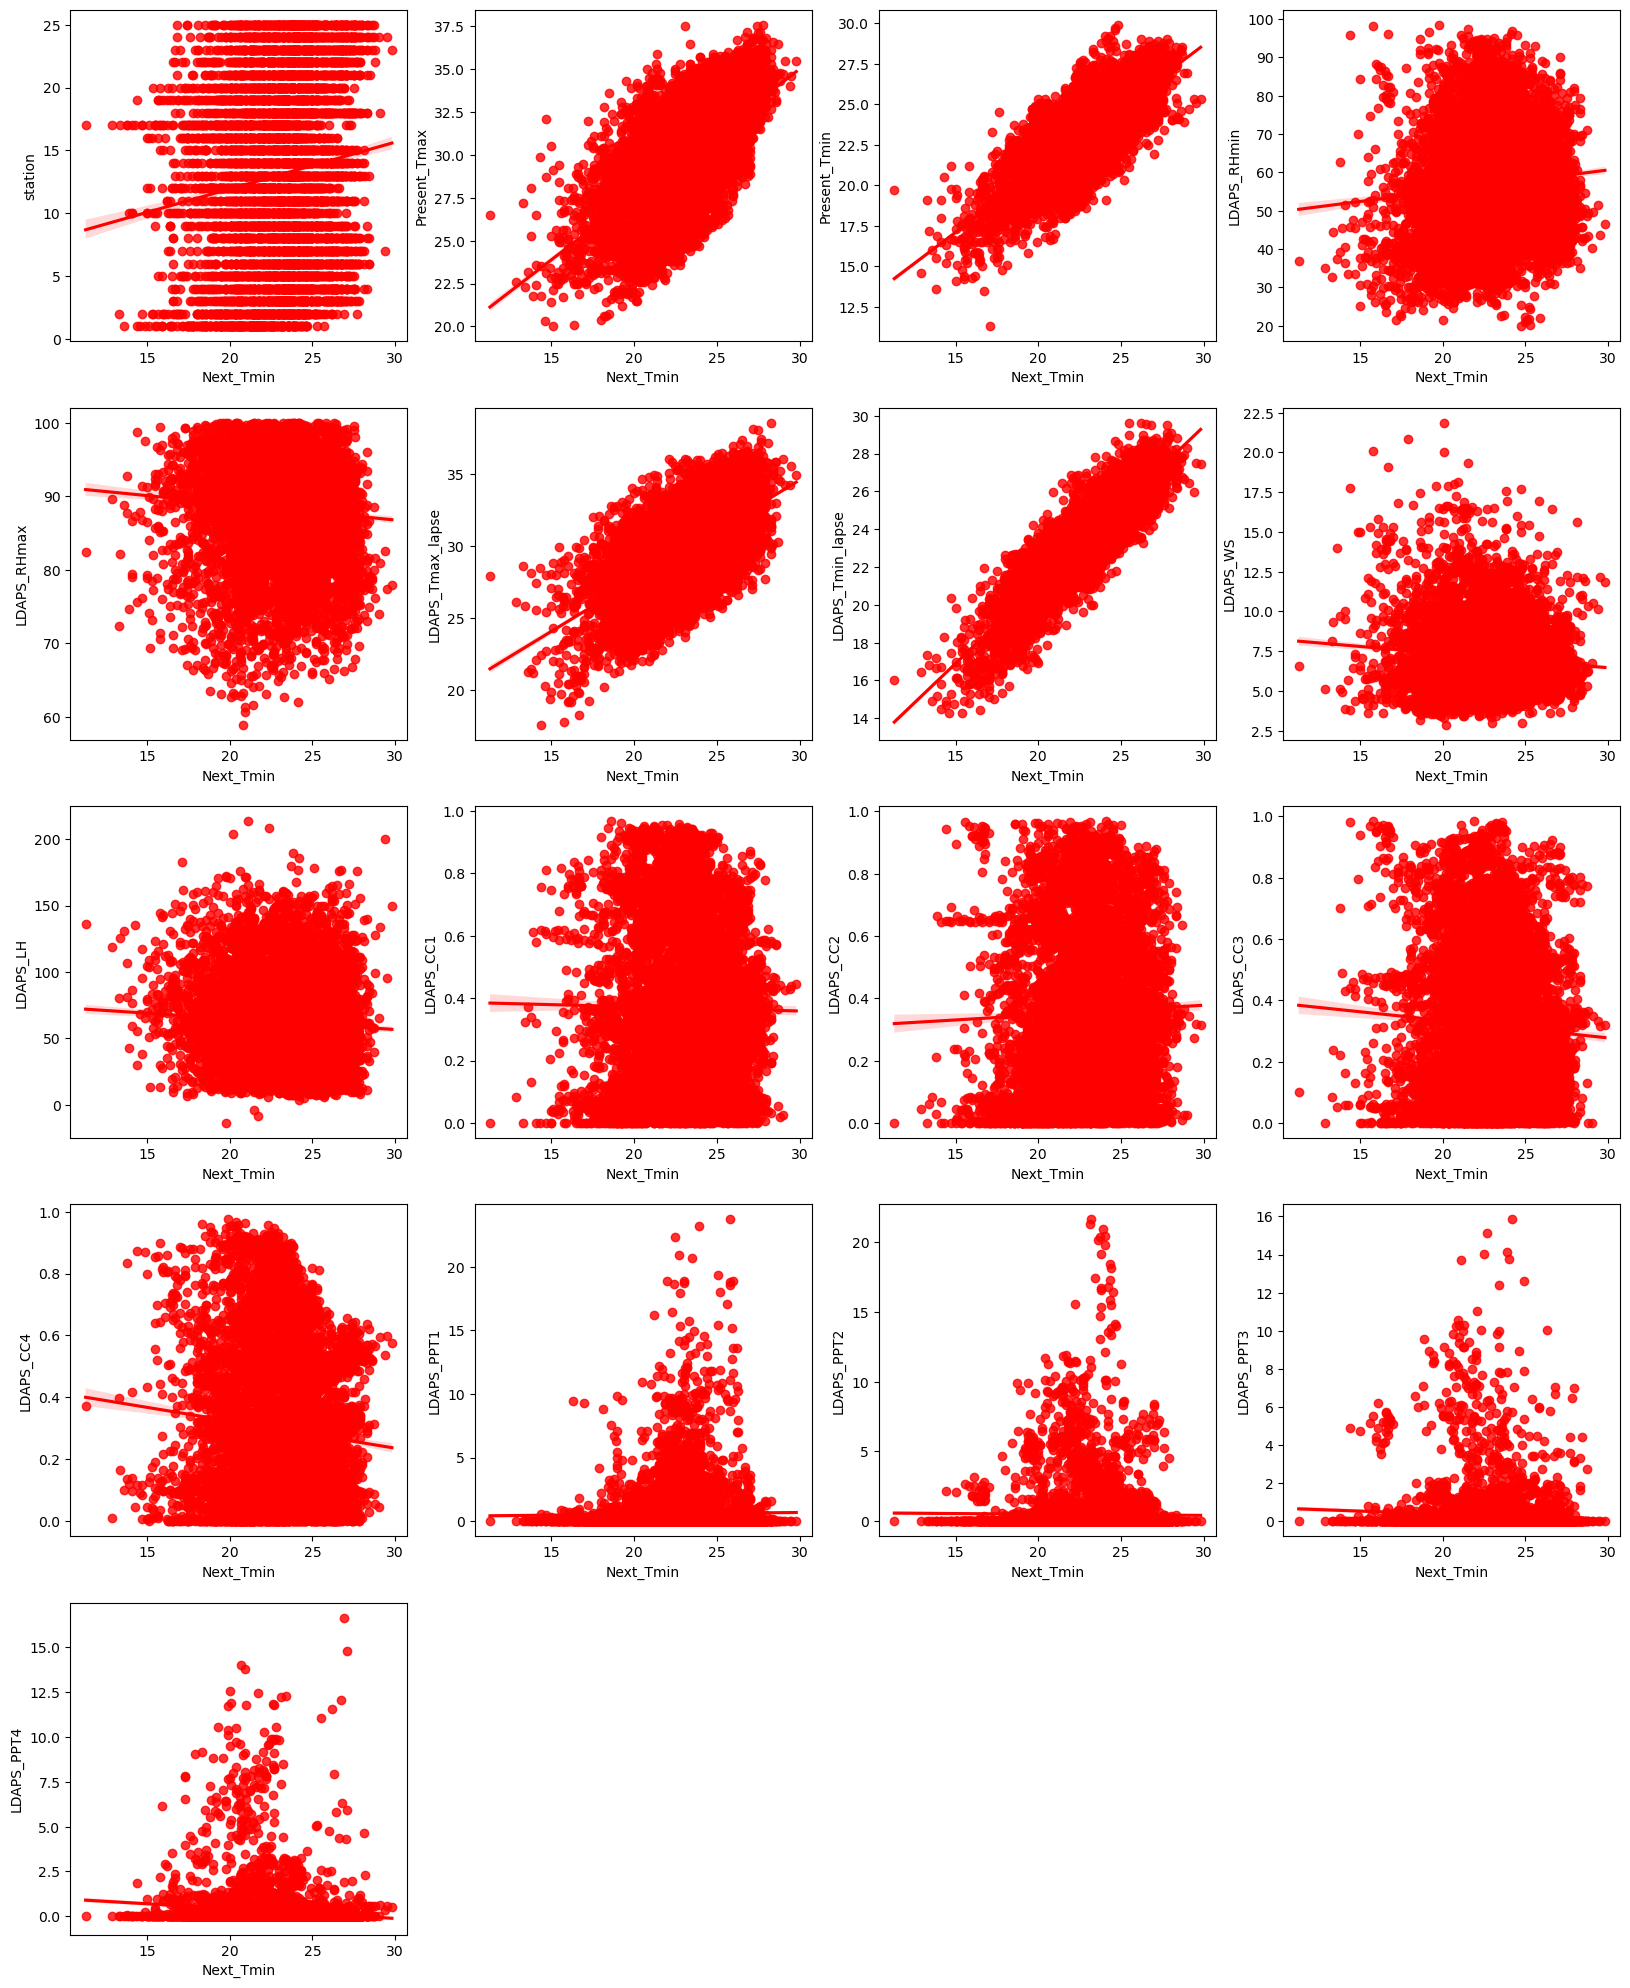

In [20]:
plt.figure(figsize = (20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='Next_Tmin', y=i, data=df, color='r')
        plt.xlabel('Next_Tmin')
        plt.ylabel(i)
    p+=1
    
plt.show()

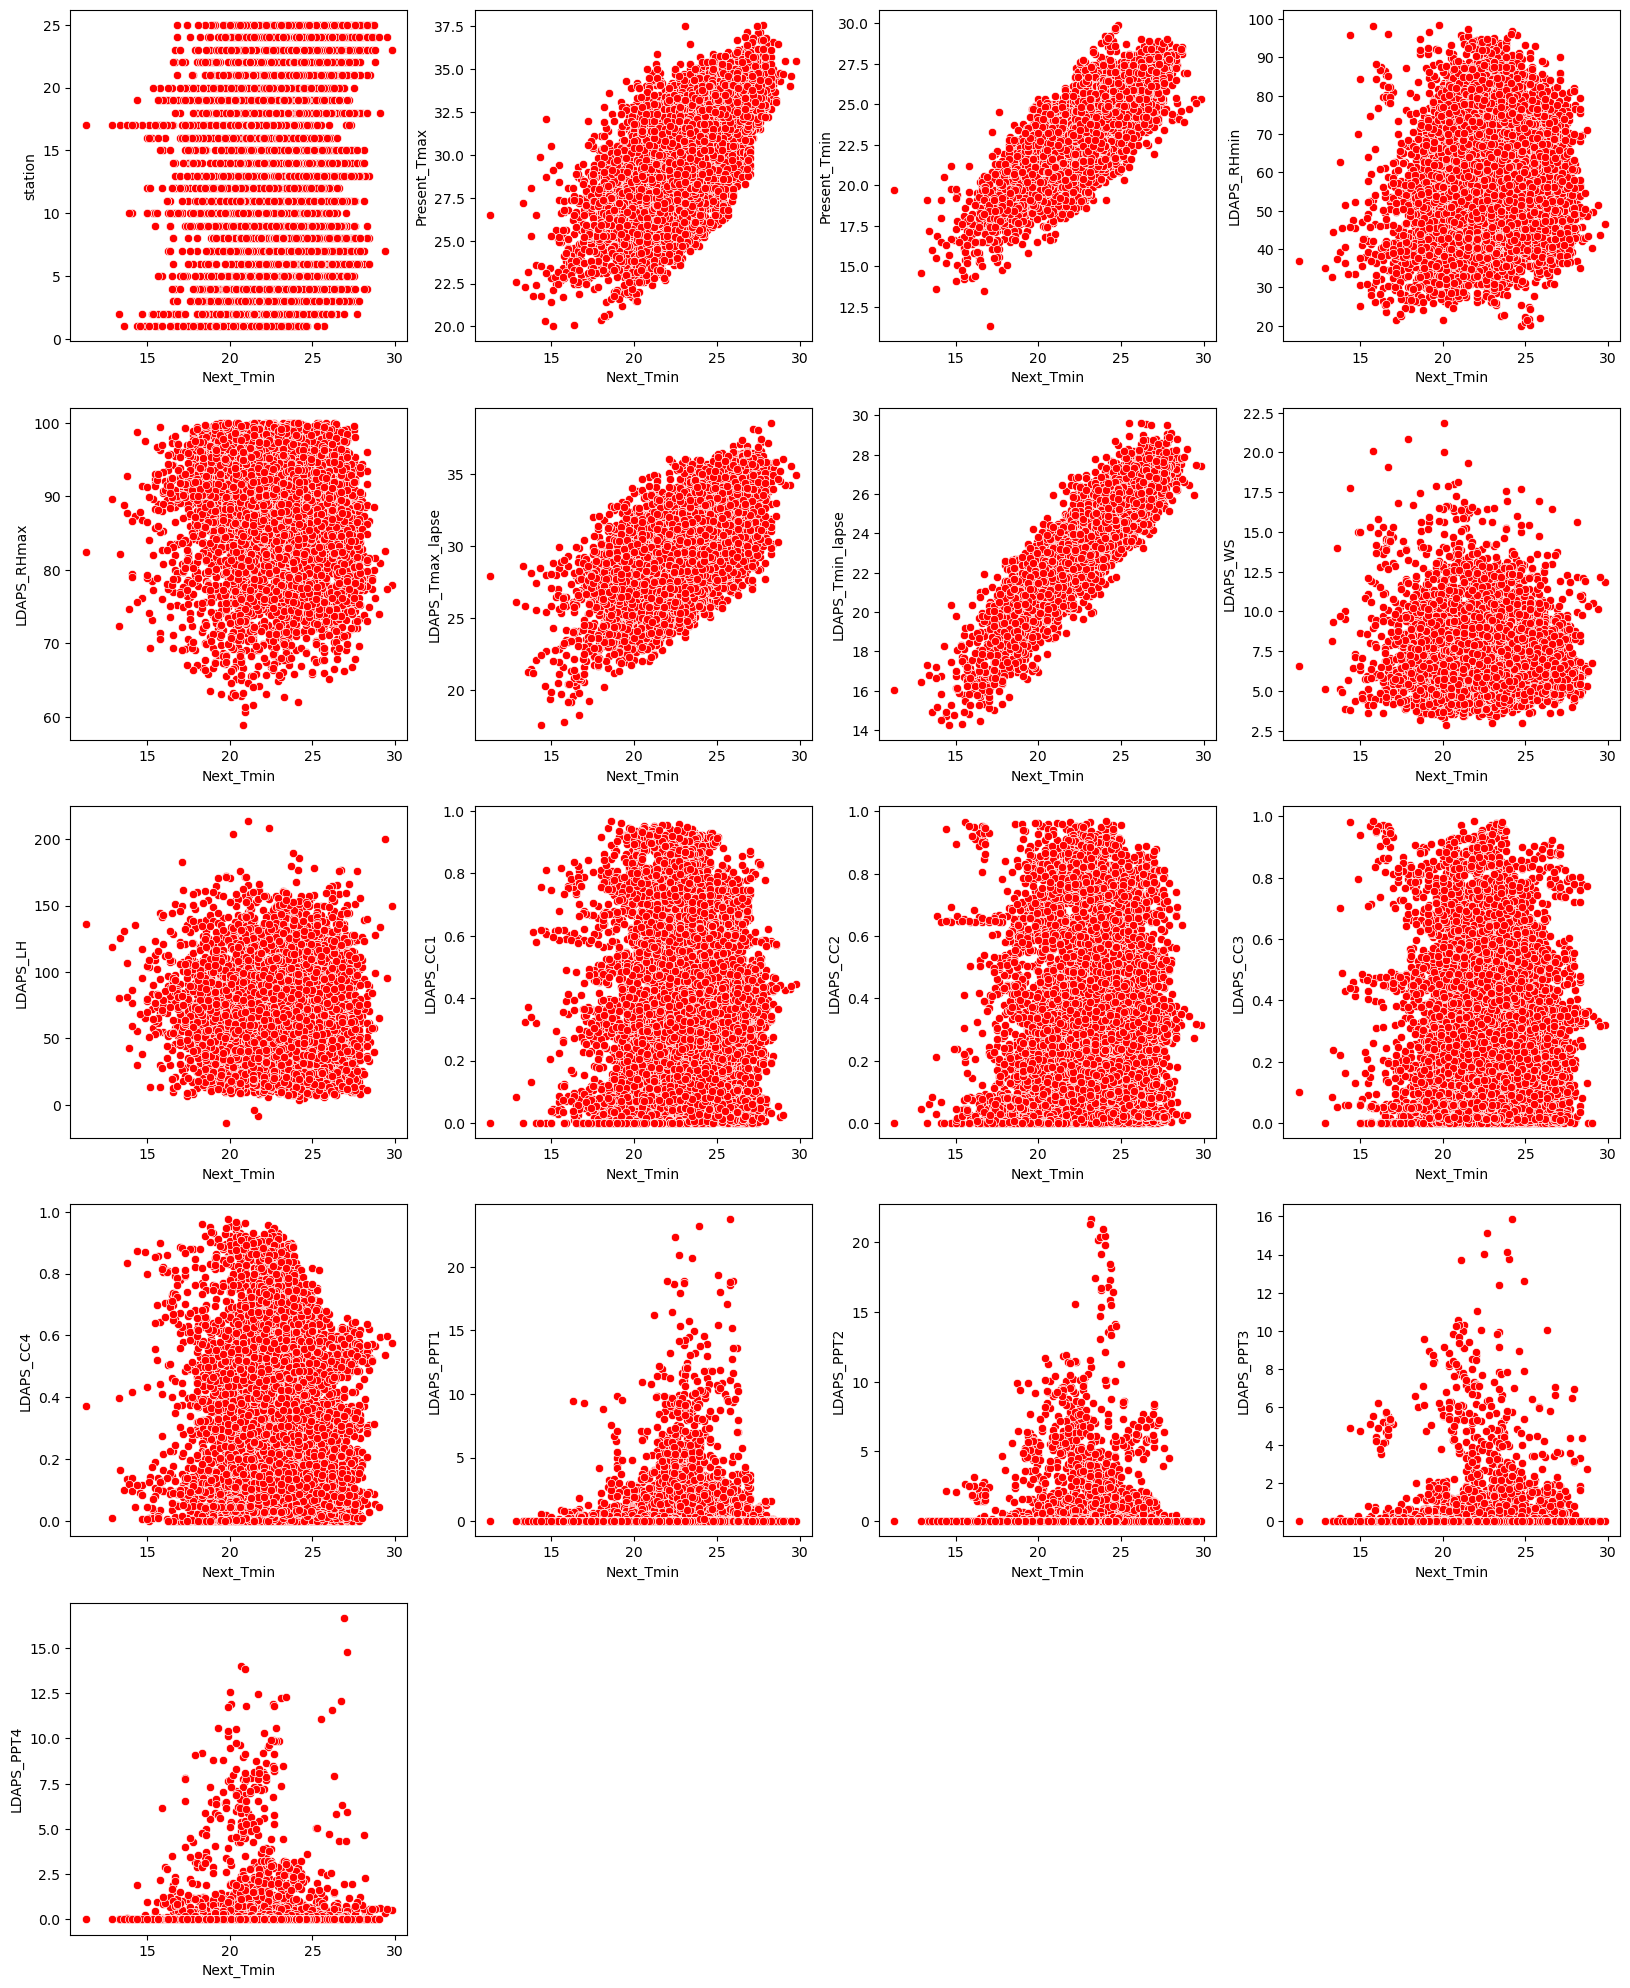

In [21]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Next_Tmin', y=i, data=df, color='r')
        plt.xlabel('Next_Tmin')
        plt.ylabel(i)
    p+=1
plt.show()

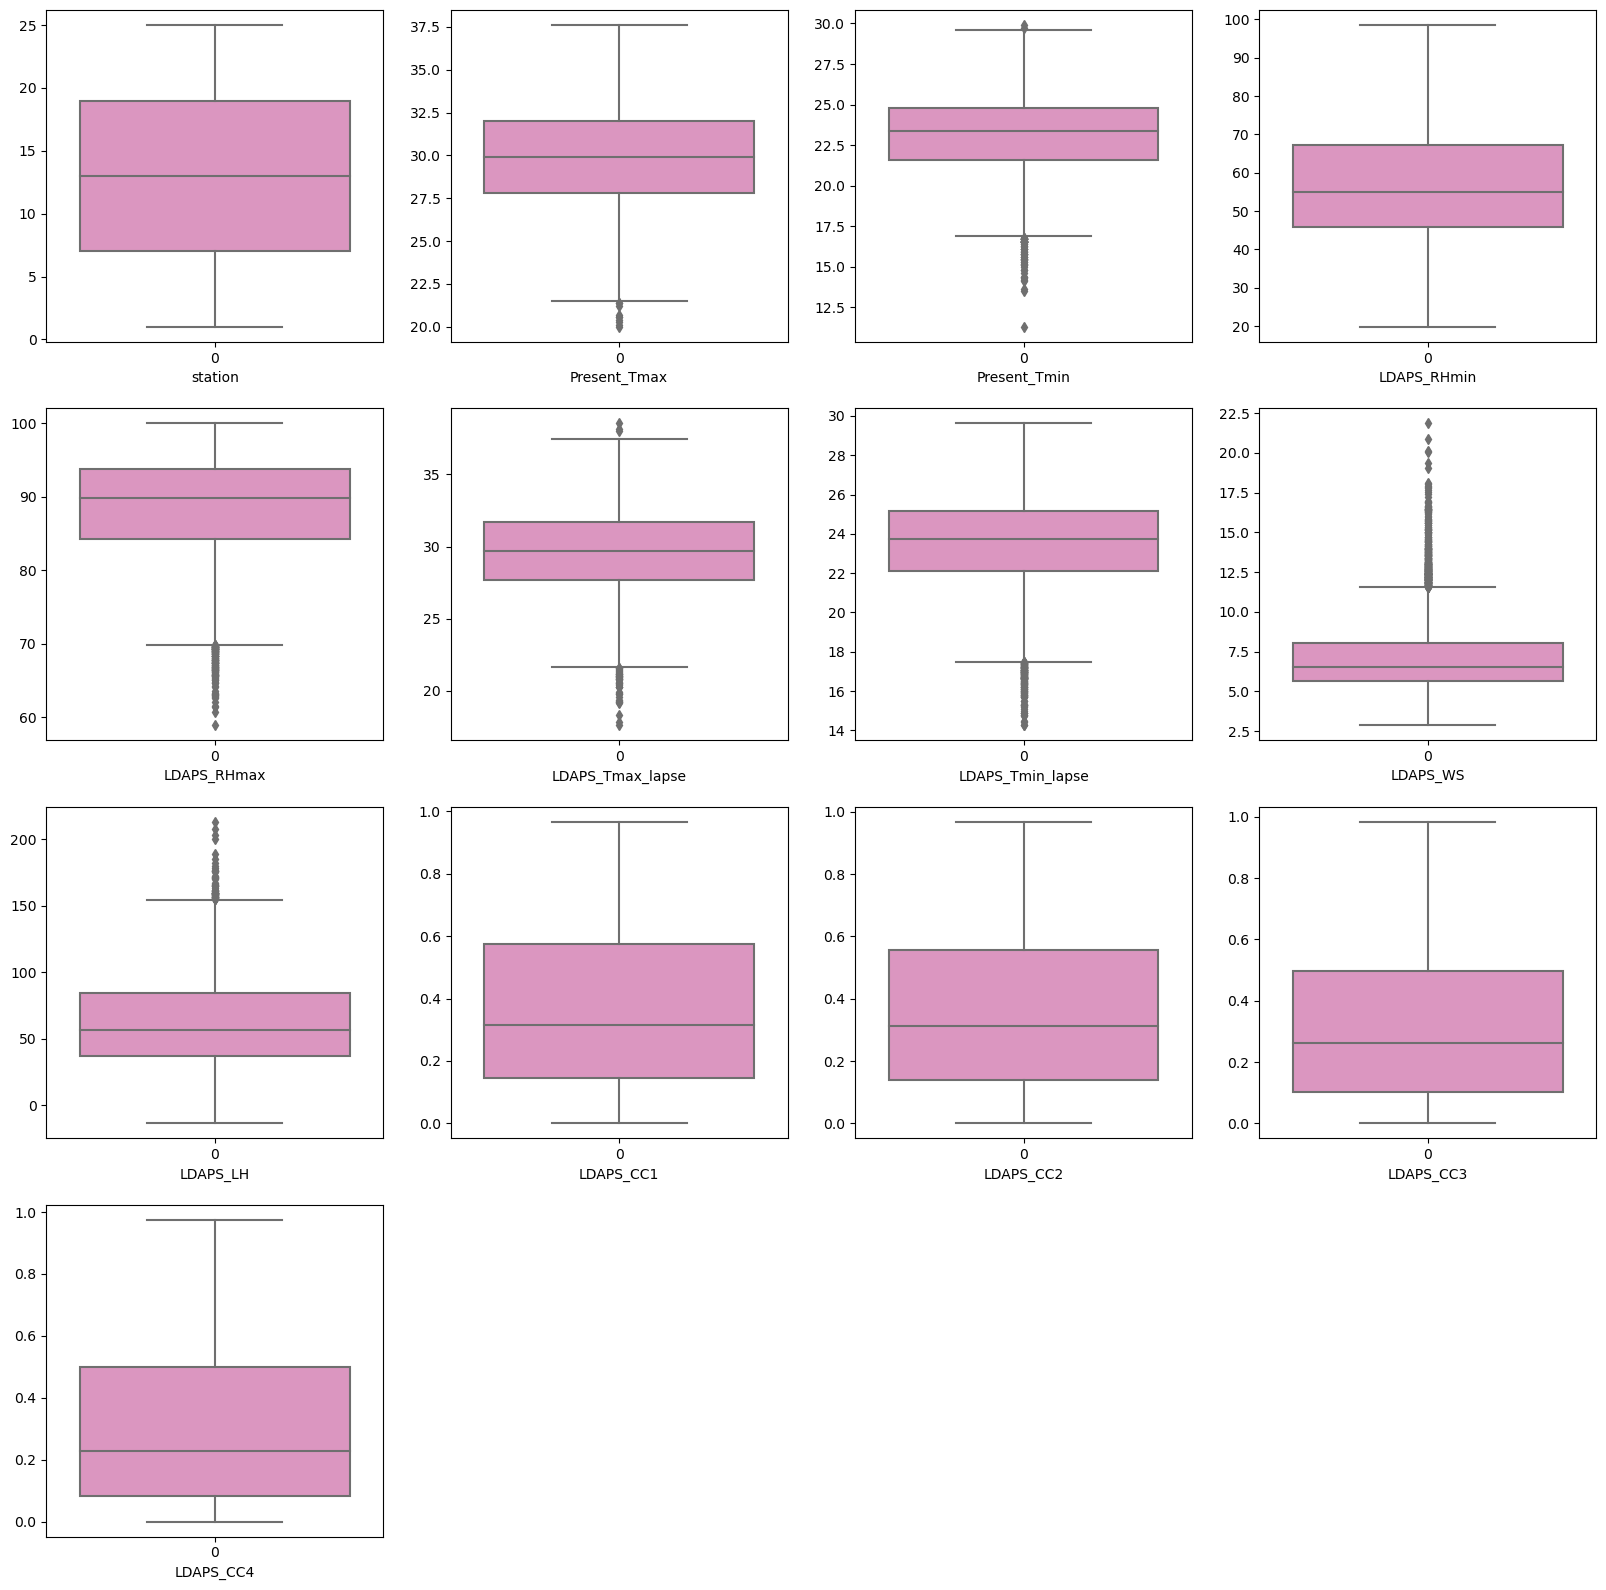

In [22]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [25]:
#Removing Skewness using Cuberoot method
df['Present_Tmax'] = np.cbrt(df['Present_Tmax'])

df['Present_Tmin'] = np.cbrt(df['Present_Tmin'])

df['LDAPS_RHmax'] = np.cbrt(df['LDAPS_RHmax'])

df['LDAPS_Tmax_lapse'] = np.cbrt(df['LDAPS_Tmax_lapse'])

df['LDAPS_Tmin_lapse'] = np.cbrt(df['LDAPS_Tmin_lapse'])

df['LDAPS_WS'] = np.cbrt(df['LDAPS_WS'])

df['LDAPS_LH'] = np.cbrt(df['LDAPS_LH'])

In [26]:
df.skew()

station            -0.004178
Present_Tmax       -0.486622
Present_Tmin       -0.704183
LDAPS_RHmin         0.301396
LDAPS_RHmax        -1.057328
LDAPS_Tmax_lapse   -0.521563
LDAPS_Tmin_lapse   -0.929222
LDAPS_WS            0.877761
LDAPS_LH           -0.348066
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [27]:
#Removing Skewness using Cuberoot method
df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])

df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

df['LDAPS_RHmax'] = np.cbrt(df['LDAPS_RHmax'])

df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])

In [28]:
df.skew()

station            -0.004178
Present_Tmax       -0.486622
Present_Tmin       -0.704183
LDAPS_RHmin         0.301396
LDAPS_RHmax        -1.063068
LDAPS_Tmax_lapse   -0.521563
LDAPS_Tmin_lapse   -0.929222
LDAPS_WS            0.877761
LDAPS_LH           -0.348066
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [29]:
#Now we will check the correlation between features using Corr()
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113637      0.131583    -0.067846   
Present_Tmax      0.113637      1.000000      0.607169    -0.209150   
Present_Tmin      0.131583      0.607169      1.000000     0.128973   
LDAPS_RHmin      -0.067846     -0.209150      0.128973     1.000000   
LDAPS_RHmax      -0.166929     -0.294069     -0.006865     0.568953   
LDAPS_Tmax_lapse  0.069743      0.570102      0.468998    -0.564191   
LDAPS_Tmin_lapse  0.101684      0.620228      0.771435     0.093991   
LDAPS_WS          0.010024     -0.120836     -0.025537     0.272609   
LDAPS_LH         -0.133257      0.109888     -0.022887    -0.022431   
LDAPS_CC1         0.006539     -0.317561      0.088046     0.612831   
LDAPS_CC2         0.003526     -0.214118      0.095262     0.744774   
LDAPS_CC3        -0.000161     -0.145256     -0.000956     0.688069   
LDAPS_CC4         0.005005     -0.139731     -0.044067     0.513937   
LDAPS_PPT1       -0.004495     -0.188894      0.110479     0.425852   
LDAPS_PPT2       -0.010172     -0.151970      0.088255     0.576784   
LDAPS_PPT3       -0.018516     -0.142757     -0.031638     0.434807   
LDAPS_PPT4       -0.006713     -0.131603     -0.101444     0.298739   
lat              -0.239118     -0.054703     -0.082247     0.085027   
lon              -0.118845      0.007079     -0.045638    -0.077590   
DEM              -0.256706     -0.192087     -0.253235     0.100684   
Slope            -0.091721     -0.107551     -0.147117     0.122454   
Solar radiation  -0.021194     -0.015385      0.077503     0.242168   
Next_Tmax         0.107747      0.606074      0.459565    -0.446824   
Next_Tmin         0.128184      0.617761      0.796120     0.093249   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166929          0.069743          0.101684  0.010024   
Present_Tmax        -0.294069          0.570102          0.620228 -0.120836   
Present_Tmin        -0.006865          0.468998          0.771435 -0.025537   
LDAPS_RHmin          0.568953         -0.564191          0.093991  0.272609   
LDAPS_RHmax          1.000000         -0.358287         -0.094534  0.108106   
LDAPS_Tmax_lapse    -0.358287          1.000000          0.656368 -0.296365   
LDAPS_Tmin_lapse    -0.094534          0.656368          1.000000 -0.118208   
LDAPS_WS             0.108106         -0.296365         -0.118208  1.000000   
LDAPS_LH             0.276747          0.002765         -0.143287 -0.009603   
LDAPS_CC1            0.426107         -0.440299          0.016352  0.274254   
LDAPS_CC2            0.382188         -0.522505          0.052485  0.242022   
LDAPS_CC3            0.219988         -0.546456         -0.040544  0.215447   
LDAPS_CC4            0.123325         -0.435179         -0.074528  0.203378   
LDAPS_PPT1           0.397237         -0.250332          0.015396  0.247606   
LDAPS_PPT2           0.356501         -0.396582         -0.001105  0.255432   
LDAPS_PPT3           0.240002         -0.343870         -0.094751  0.199494   
LDAPS_PPT4           0.170251         -0.294086         -0.152112  0.244099   
lat                  0.184929         -0.045174         -0.098831  0.020835   
lon                  0.027903          0.087990         -0.024133 -0.066720   
DEM                  0.170613         -0.181359         -0.194491  0.186843   
Slope                0.211329         -0.163465         -0.184020  0.163937   
Solar radiation      0.139351          0.058855          0.179372  0.134507   
Next_Tmax           -0.278564          0.836539          0.587827 -0.327069   
Next_Tmin           -0.069848          0.591759          0.882203 -0.078879   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.133257   0.006539  ...   -0.010172   -0.018516   
Present_Tmax      0.109888  -0.317561  ...   -0.151970   -0.142757   
Present_Tmin     -0.022887   0.088046  ...    0.088255   

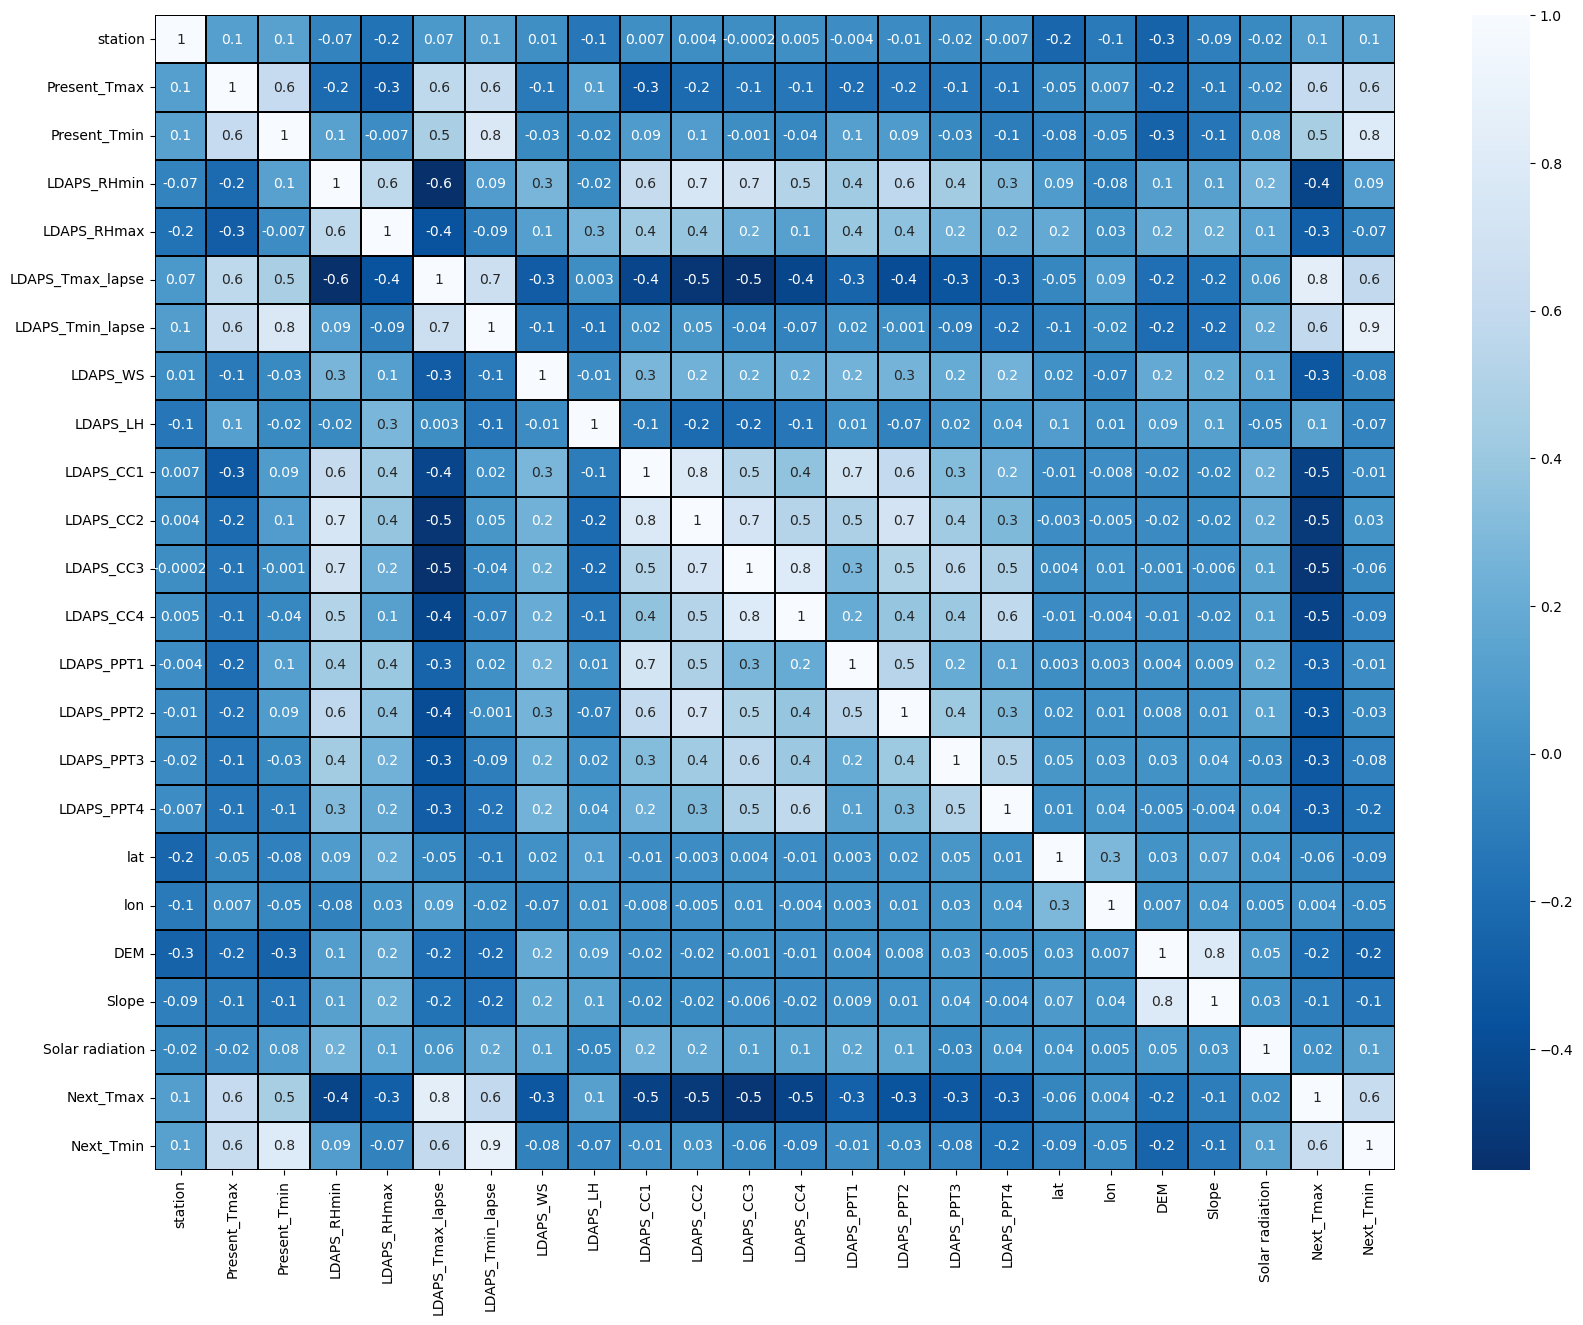

In [30]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [33]:
#Checking the correlation between features and the target
cor = df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113637      0.131583    -0.067846   
Present_Tmax      0.113637      1.000000      0.607169    -0.209150   
Present_Tmin      0.131583      0.607169      1.000000     0.128973   
LDAPS_RHmin      -0.067846     -0.209150      0.128973     1.000000   
LDAPS_RHmax      -0.166929     -0.294069     -0.006865     0.568953   
LDAPS_Tmax_lapse  0.069743      0.570102      0.468998    -0.564191   
LDAPS_Tmin_lapse  0.101684      0.620228      0.771435     0.093991   
LDAPS_WS          0.010024     -0.120836     -0.025537     0.272609   
LDAPS_LH         -0.133257      0.109888     -0.022887    -0.022431   
LDAPS_CC1         0.006539     -0.317561      0.088046     0.612831   
LDAPS_CC2         0.003526     -0.214118      0.095262     0.744774   
LDAPS_CC3        -0.000161     -0.145256     -0.000956     0.688069   
LDAPS_CC4         0.005005     -0.139731     -0.044067     0.513937   
LDAPS_PPT1       -0.004495     -0.188894      0.110479     0.425852   
LDAPS_PPT2       -0.010172     -0.151970      0.088255     0.576784   
LDAPS_PPT3       -0.018516     -0.142757     -0.031638     0.434807   
LDAPS_PPT4       -0.006713     -0.131603     -0.101444     0.298739   
lat              -0.239118     -0.054703     -0.082247     0.085027   
lon              -0.118845      0.007079     -0.045638    -0.077590   
DEM              -0.256706     -0.192087     -0.253235     0.100684   
Slope            -0.091721     -0.107551     -0.147117     0.122454   
Solar radiation  -0.021194     -0.015385      0.077503     0.242168   
Next_Tmax         0.107747      0.606074      0.459565    -0.446824   
Next_Tmin         0.128184      0.617761      0.796120     0.093249   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.166929          0.069743          0.101684  0.010024   
Present_Tmax        -0.294069          0.570102          0.620228 -0.120836   
Present_Tmin        -0.006865          0.468998          0.771435 -0.025537   
LDAPS_RHmin          0.568953         -0.564191          0.093991  0.272609   
LDAPS_RHmax          1.000000         -0.358287         -0.094534  0.108106   
LDAPS_Tmax_lapse    -0.358287          1.000000          0.656368 -0.296365   
LDAPS_Tmin_lapse    -0.094534          0.656368          1.000000 -0.118208   
LDAPS_WS             0.108106         -0.296365         -0.118208  1.000000   
LDAPS_LH             0.276747          0.002765         -0.143287 -0.009603   
LDAPS_CC1            0.426107         -0.440299          0.016352  0.274254   
LDAPS_CC2            0.382188         -0.522505          0.052485  0.242022   
LDAPS_CC3            0.219988         -0.546456         -0.040544  0.215447   
LDAPS_CC4            0.123325         -0.435179         -0.074528  0.203378   
LDAPS_PPT1           0.397237         -0.250332          0.015396  0.247606   
LDAPS_PPT2           0.356501         -0.396582         -0.001105  0.255432   
LDAPS_PPT3           0.240002         -0.343870         -0.094751  0.199494   
LDAPS_PPT4           0.170251         -0.294086         -0.152112  0.244099   
lat                  0.184929         -0.045174         -0.098831  0.020835   
lon                  0.027903          0.087990         -0.024133 -0.066720   
DEM                  0.170613         -0.181359         -0.194491  0.186843   
Slope                0.211329         -0.163465         -0.184020  0.163937   
Solar radiation      0.139351          0.058855          0.179372  0.134507   
Next_Tmax           -0.278564          0.836539          0.587827 -0.327069   
Next_Tmin           -0.069848          0.591759          0.882203 -0.078879   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.133257   0.006539  ...   -0.010172   -0.018516   
Present_Tmax      0.109888  -0.317561  ...   -0.151970   -0.142757   
Present_Tmin     -0.022887   0.088046  ...    0.088255   

In [34]:
cor['Next_Tmin'].sort_values(ascending = False)

Next_Tmin           1.000000
LDAPS_Tmin_lapse    0.882203
Present_Tmin        0.796120
Present_Tmax        0.617761
Next_Tmax           0.616629
LDAPS_Tmax_lapse    0.591759
station             0.128184
Solar radiation     0.125517
LDAPS_RHmin         0.093249
LDAPS_CC2           0.030358
LDAPS_PPT1         -0.010345
LDAPS_CC1          -0.012877
LDAPS_PPT2         -0.027693
lon                -0.045758
LDAPS_CC3          -0.056490
LDAPS_LH           -0.067639
LDAPS_RHmax        -0.069848
LDAPS_WS           -0.078879
LDAPS_PPT3         -0.083135
lat                -0.085136
LDAPS_CC4          -0.086197
Slope              -0.148379
LDAPS_PPT4         -0.162844
DEM                -0.249303
Name: Next_Tmin, dtype: float64

In [35]:
#Seperate features and label
x = df.drop("Next_Tmin", axis=1)
y = df["Next_Tmin"]

In [36]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664607     -0.303024     -0.702325     0.104660     0.401917   
1    -1.526052      0.733657     -0.615554    -0.305052     0.335686   
2    -1.387498      0.640827      0.092237    -0.549344    -0.557794   
3    -1.248943      0.764414      0.132307     0.103573     1.075374   
4    -1.110389      0.578468     -0.486837    -0.037665     0.277182   
...        ...           ...           ...          ...          ...   
7583  1.106481     -2.419083     -2.414299    -2.190405    -1.385212   
7584  1.245036     -2.674483     -2.624738    -1.820788    -0.597540   
7585  1.383590     -2.335367     -2.785647    -2.050081    -1.294284   
7586  1.522145     -2.335367     -2.466478    -2.234735    -1.531074   
7587  1.660699     -2.377138     -2.624738    -2.310467    -1.538857   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.478583         -0.160122 -0.042360  0.374098  -0.513123  ...   
1             0.124438          0.260424 -0.654843 -0.128111  -0.545304  ...   
2             0.203434          0.470751 -0.403372 -1.439484  -0.606944  ...   
3             0.076183         -0.027627 -0.679081  0.275061  -0.580143  ...   
4            -0.121327          0.038246 -0.629990  1.235891  -0.827872  ...   
...                ...               ...       ...       ...        ...  ...   
7583         -0.570398         -2.349439 -0.154019 -2.251709  -1.203497  ...   
7584         -0.968949         -2.607403 -0.611006  0.687177  -1.151793  ...   
7585         -1.099233         -2.106313 -0.397499  0.441315  -1.290699  ...   
7586         -0.857549         -2.127758 -0.185749 -0.281649  -1.268430  ...   
7587         -0.525751         -2.235559  0.193287 -2.303796  -1.218554  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.559482   -0.509339   -0.483908   -0.430019  1.186076 -0.005302   
1      -0.559482   -0.509339   -0.483908   -0.430019  1.186076  0.512280   
2      -0.559482   -0.509339   -0.483908   -0.430019  0.650626  0.840503   
3      -0.559482   -0.509339   -0.483908   -0.430019  1.987268  0.386040   
4      -0.559482   -0.509339   -0.483908   -0.430019  0.117159  1.812547   
...          ...         ...         ...         ...       ...       ...   
7583   -0.559482   -0.509339   -0.483908   -0.430019  0.117159  0.613271   
7584   -0.559482   -0.509339   -0.483908   -0.430019 -0.686016  1.193973   
7585   -0.559482   -0.509339   -0.483908   -0.430019 -0.150566 -1.267697   
7586   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -1.040466   
7587   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -0.270405   

           DEM     Slope  Solar radiation  Next_Tmax  
0     2.769091  1.111162         1.510565  -0.366861  
1    -0.315828 -0.543220         1.222997   0.083068  
2    -0.526719 -0.723891         1.209602   0.275895  
3    -0.298272  0.928888         1.194265   0.468721  
4    -0.494848 -0.549485         1.200286   0.308032  
...        ...       ...              ...        ...  
7583 -0.655747 -0.500966        -2.065599  -0.848928  
7584 -0.735482 -0.820711        -2.098689  -0.720377  
7585 -0.852919 -0.804538        -2.095175  -0.623964  
7586 -0.821476 -0.755800        -2.106671  -0.527550  
7587 -0.779341 -0.720103        -2.076487  -0.784652  

[7588 rows x 23 columns]

In [37]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [38]:
vif

VIF values          Features
0     1.238425           station
1     2.873650      Present_Tmax
2     3.132667      Present_Tmin
3     6.502964       LDAPS_RHmin
4     2.178746       LDAPS_RHmax
5     9.562343  LDAPS_Tmax_lapse
6     7.660302  LDAPS_Tmin_lapse
7     1.328057          LDAPS_WS
8     1.524407          LDAPS_LH
9     4.917864         LDAPS_CC1
10    5.941822         LDAPS_CC2
11    5.706572         LDAPS_CC3
12    3.443002         LDAPS_CC4
13    2.516556        LDAPS_PPT1
14    2.415549        LDAPS_PPT2
15    1.859357        LDAPS_PPT3
16    1.951463        LDAPS_PPT4
17    1.232830               lat
18    1.179474               lon
19    3.223091               DEM
20    3.021428             Slope
21    1.252710   Solar radiation
22    4.450522         Next_Tmax

In [39]:
x.drop("LDAPS_Tmax_lapse", axis=1, inplace=True)

In [40]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values          Features
0     1.232460           station
1     2.818484      Present_Tmax
2     3.131516      Present_Tmin
3     4.398219       LDAPS_RHmin
4     2.174466       LDAPS_RHmax
5     4.488516  LDAPS_Tmin_lapse
6     1.326361          LDAPS_WS
7     1.524090          LDAPS_LH
8     4.869733         LDAPS_CC1
9     5.909116         LDAPS_CC2
10    5.665304         LDAPS_CC3
11    3.434948         LDAPS_CC4
12    2.469277        LDAPS_PPT1
13    2.414341        LDAPS_PPT2
14    1.842099        LDAPS_PPT3
15    1.946446        LDAPS_PPT4
16    1.222082               lat
17    1.157084               lon
18    3.220575               DEM
19    3.017823             Slope
20    1.190127   Solar radiation
21    3.674068         Next_Tmax

In [41]:
#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [42]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.8617618109353293 at random_state 103


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=maxRS)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [45]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.8617618109353293
R2_score on training Data: 84.35633414499435
Mean Absolute Error: 0.7418580033856984
Mean Squared Error: 0.884123394139564
Root mean squared error: 0.9402783599230411


In [46]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  0.9181365720155131
R2_score on training Data: 98.64649614325297
Mean Absolute Error: 0.5485621431708387
Mean Squared Error: 0.5235700228370662
Root mean squared error: 0.7235813864639321


In [47]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score:  0.8810805017302551
R2_score on training Data: 91.38559592965164
Mean Absolute Error: 0.6674747474747476
Mean Squared Error: 0.760567764602547
Root mean squared error: 0.8721053632460627


In [48]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.9065927510027184
R2_score on training Data: 91.13511739942261
Mean Absolute Error: 0.6061659904349358
Mean Squared Error: 0.5974002884404229
Root mean squared error: 0.7729167409497758


In [49]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score:  0.6367333450940942
R2_score on training Data: 61.24613833350556
Mean Absolute Error: 1.2157328583868228
Mean Squared Error: 2.323327223006978
Root mean squared error: 1.524246444315019


In [50]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score:  0.8617638856656117
R2_score on training Data: 84.35633055431828
Mean Absolute Error: 0.7418528072302472
Mean Squared Error: 0.8841101248860267
Root mean squared error: 0.9402713038724657


In [51]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  0.8059555488990734
R2_score on training Data: 100.0
Mean Absolute Error: 0.8249011857707511
Mean Squared Error: 1.2410408432147562
Root mean squared error: 1.114020126934319


In [52]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  0.9187243024633764
R2_score on training Data: 92.96635058055878
Mean Absolute Error: 0.5467819429891319
Mean Squared Error: 0.5198111032366288
Root mean squared error: 0.7209792668562868


In [53]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  0.9277614661555549
R2_score on training Data: 100.0
Mean Absolute Error: 0.5162854633289412
Mean Squared Error: 0.4620125463328939
Root mean squared error: 0.6797150478935228


In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
score = cross_val_score(LR, x, y, cv=5, scoring = 'r2')
print(score)
print(score.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_LR) - score.mean())*100)

[0.7295716  0.6829885  0.82095389 0.881061   0.87623894]
<built-in method mean of numpy.ndarray object at 0x000001A819D7BCF0>
Difference between R2 score and cross validation score is - 6.359902389360372


In [56]:
score1 = cross_val_score(RFR, x, y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_RFR) - score1.mean())*100)

[0.70729296 0.67878801 0.8259022  0.88634549 0.88309303]
<built-in method mean of numpy.ndarray object at 0x000001A819D7B750>
Difference between R2 score and cross validation score is - 12.185223416181168


In [57]:
score2 = cross_val_score(knn, x, y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_knn) - score2.mean())*100)

[0.50809014 0.47068533 0.67473685 0.73415863 0.81415449]
<built-in method mean of numpy.ndarray object at 0x000001A819D7B330>
Difference between R2 score and cross validation score is - 24.071541312767973


In [59]:
score3 = cross_val_score(GBR, x, y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_GBR) - score3.mean())*100)

[0.71298189 0.69175954 0.83725994 0.89070873 0.90590336]
<built-in method mean of numpy.ndarray object at 0x000001A827DD4C90>
Difference between R2 score and cross validation score is - 9.887006084367233


In [60]:
score4 = cross_val_score(lasso, x, y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_lasso) - score4.mean())*100)

[0.52726119 0.42435645 0.60096878 0.54808958 0.67019969]
<built-in method mean of numpy.ndarray object at 0x000001A827DD4F90>
Difference between R2 score and cross validation score is - 8.255820701339122


In [61]:
score5 = cross_val_score(rd, x, y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_rd) - score5.mean())*100)

[0.72956652 0.6830098  0.82094237 0.88106348 0.87627546]
<built-in method mean of numpy.ndarray object at 0x000001A827DD53B0>
Difference between R2 score and cross validation score is - 6.359235927049722


In [62]:
score6 = cross_val_score(svr, x, y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_svr) - score6.mean())*100)

[0.69179492 0.65584094 0.80933428 0.85323892 0.84573395]
<built-in method mean of numpy.ndarray object at 0x000001A827DD4930>
Difference between R2 score and cross validation score is - 14.753570054787135


In [63]:
score7 = cross_val_score(etr, x, y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_ETR) - score7.mean())*100)

[0.71766744 0.69036711 0.82927671 0.88727027 0.89827474]
<built-in method mean of numpy.ndarray object at 0x000001A827DD4E10>
Difference between R2 score and cross validation score is - 12.319021266585494


In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [66]:
# Create a based model
RFR = RandomForestRegressor()

In [67]:
# Instantiate the grid search model
GCV = GridSearchCV(estimator = RFR, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [68]:
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [69]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [70]:
Model = RandomForestRegressor(bootstrap = True, max_depth=80, max_features=3, min_samples_leaf=3, 
                              min_samples_split=8, n_estimators=300)

In [71]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score: ', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.9128204347675134
Mean Absolute Error: 0.5740662222272406
Mean Squared Error: 0.5575701883428112
Root mean squared error: 0.7467062262649289


In [72]:
#Saving the model using .pk1
import joblib
joblib.dump(Model, "TemperatureForecastProject_Regression1.pk1")

['TemperatureForecastProject_Regression1.pk1']

In [73]:
#Lets load the saved model and get the predictions
model = joblib.load('TemperatureForecastProject_Regression1.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([21.47890803, 25.4467453 , 19.26322687, ..., 21.57265244,
       22.08529201, 23.90758915])

In [74]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0     21.478908      21.7
1     25.446745      25.0
2     19.263227      19.4
3     25.044192      26.0
4     22.058222      21.8
...         ...       ...
2272  22.106840      21.9
2273  19.973556      19.9
2274  21.572652      22.2
2275  22.085292      22.5
2276  23.907589      25.4

[2277 rows x 2 columns]

# Part 2 of Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing Dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

In [4]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [5]:
#checking the columns of dataset
df.columns.tolist()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [6]:
#checking thev types of column
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

In [7]:
#checking the null values
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [8]:
df = df.dropna()

In [9]:
#checking the null values
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [10]:
df.shape

(7588, 25)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64
 17  

<Axes: >

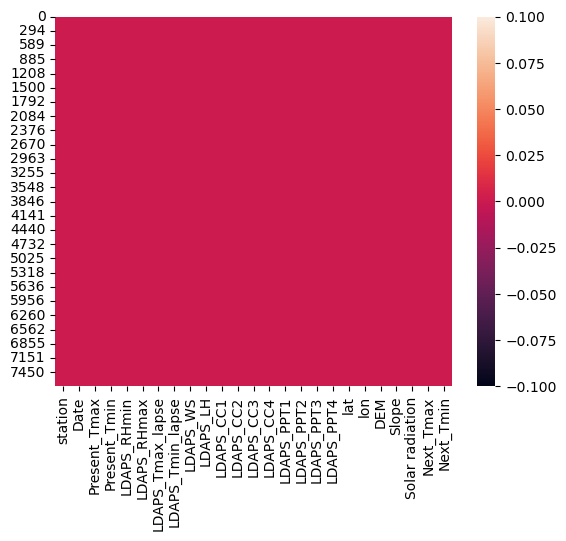

In [12]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [13]:
#Converting the datatype of Date column from object to datetime
df['Date'] = pd.to_datetime(df.Date, format = '%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7588 non-null   float64       
 1   Date              7588 non-null   datetime64[ns]
 2   Present_Tmax      7588 non-null   float64       
 3   Present_Tmin      7588 non-null   float64       
 4   LDAPS_RHmin       7588 non-null   float64       
 5   LDAPS_RHmax       7588 non-null   float64       
 6   LDAPS_Tmax_lapse  7588 non-null   float64       
 7   LDAPS_Tmin_lapse  7588 non-null   float64       
 8   LDAPS_WS          7588 non-null   float64       
 9   LDAPS_LH          7588 non-null   float64       
 10  LDAPS_CC1         7588 non-null   float64       
 11  LDAPS_CC2         7588 non-null   float64       
 12  LDAPS_CC3         7588 non-null   float64       
 13  LDAPS_CC4         7588 non-null   float64       
 14  LDAPS_PPT1        7588 non-nu

In [14]:
#Setting Date as DataFrame index
df.set_index('Date', inplace=True)

In [15]:
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    78.261383   
2017-08-30     22.0          22.5          17.4    30.094858    83.690018   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  6.603253    9.614074   
2017-08-30         26.704905         17.814038  5.768083   82.146707   
2017-08-30         26.352081         18.775678  6.148918   72.058294   
2017-08-30         27.010193         18.733519  6.542819   47.241457   
2017-08-30         27.939516         18.522965  7.289264    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   
...               ...  ...         ...         ...         ...      ...   
2017-08-30   0.052902  ...         0.0         0.0         0.0  37.5507   
2017-08-30   0.066461  ...         0.0         0.0         0.0  37.5102   
2017-08-30   0.030034  ...         0.0         0.0         0.0  37.5372   
2017-08-30   0.035874  ...         0.0         0.0         0.0  37.5237   
2017-08-30   0.048954  ...         0.0         0.0         0.0  37.5237   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  
...             ...       ...     ...              ...        ...        ...  
2017-08-30  127.040   26.2980  0.5721      4456.024414       27.6       17.7  
2017-08-30  127.086   21.9668  0.1332      4441.803711       28.0       17.1  
2017-08-30  126.891   15.5876  0.1554      4443.313965       28.3       18.1  
2017-08-30  126.909   17.2956  0.2223      4438.373535       28.6       18.8  
2017-08-30  126.970   19.5844  0.2713      4451.345215       27.8       17.4  

[7588 rows x 24 columns]

In [16]:
#Checking number of unique values in each column
df.nunique().to_frame('No of unique values')

No of unique values
station                            25
Present_Tmax                      167
Present_Tmin                      155
LDAPS_RHmin                      7585
LDAPS_RHmax                      7577
LDAPS_Tmax_lapse                 7588
LDAPS_Tmin_lapse                 7588
LDAPS_WS                         7588
LDAPS_LH                         7588
LDAPS_CC1                        7485
LDAPS_CC2                        7496
LDAPS_CC3                        7512
LDAPS_CC4                        7438
LDAPS_PPT1                       2779
LDAPS_PPT2                       2479
LDAPS_PPT3                       2326
LDAPS_PPT4                       1892
lat                                12
lon                                25
DEM                                25
Slope                              25
Solar radiation                  1575
Next_Tmax                         181
Next_Tmin                         157

In [17]:
#Checking the value counts of each column
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

station
25.0    307
10.0    307
23.0    307
18.0    307
17.0    307
2.0     307
3.0     306
4.0     306
13.0    305
16.0    304
20.0    304
21.0    304
14.0    303
1.0     303
9.0     302
12.0    302
15.0    302
19.0    302
22.0    302
24.0    302
11.0    301
7.0     301
6.0     301
8.0     300
5.0     296
Name: count, dtype: int64


Present_Tmax
31.4    112
29.4    108
29.1    106
29.2    105
30.6    105
       ... 
21.2      1
20.1      1
36.4      1
20.3      1
20.0      1
Name: count, Length: 167, dtype: int64


Present_Tmin
24.0    160
23.8    153
23.5    143
23.1    143
23.3    140
       ... 
14.3      1
29.9      1
29.7      1
29.1      1
15.0      1
Name: count, Length: 155, dtype: int64


LDAPS_RHmin
77.030350    2
51.810596    2
71.658089    2
58.255688    1
46.582764    1
            ..
58.950947    1
58.566174    1
59.790348    1
51.062355    1
22.933014    1
Name: count, Length: 7585, dtype: int64


LDAPS_RHmax
92.531029    2
88.876610    2
85.863731    2
96.525200    2
9

In [18]:
df.head()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  6.818887   69.451805   
2013-06-30         29.850689         24.035009  5.691890   51.937448   
2013-06-30         30.091292         24.565633  6.138224   20.573050   
2013-06-30         29.704629         23.326177  5.650050   65.727144   
2013-06-30         29.113934         23.486480  5.735004  107.965535   

            LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
Date                   ...                                                
2013-06-30   0.233947  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.225508  ...         0.0         0.0         0.0  37.6046   
2013-06-30   0.209344  ...         0.0         0.0         0.0  37.5776   
2013-06-30   0.216372  ...         0.0         0.0         0.0  37.6450   
2013-06-30   0.151407  ...         0.0         0.0         0.0  37.5507   

                lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  
Date                                                                          
2013-06-30  126.991  212.3350  2.7850      5992.895996       29.1       21.2  
2013-06-30  127.032   44.7624  0.5141      5869.312500       30.5       22.5  
2013-06-30  127.058   33.3068  0.2661      5863.555664       31.1       23.9  
2013-06-30  127.022   45.7160  2.5348      5856.964844       31.7       24.3  
2013-06-30  127.135   35.0380  0.5055      5859.552246       31.2       22.5  

[5 rows x 24 columns]

In [19]:
#Stastical summary of numerical column
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7588.000000  ...  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510  ...     0.480738     0.275007     0.265373    37.544792   
std       0.262260  ...     1.743327     1.146087     1.179661     0.050428   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.146546  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315706  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.574174  ...     0.017735     0.007855     0.000017    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

              lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7588.00000  7588.000000  7588.000000      7588.000000  7588.000000   
mean    126.99142    61.918136     1.259755      5343.724208    30.241526   
std       0.07922    54.323529     1.372748       429.782561     3.111807   
min     126.82600    12.370000     0.098500      4329.520508    17.400000   
25%     126.93700    28.700000     0.271300      5001.485717    28.200000   
50%     126.99500    45.716000     0.618000      5441.987305    30.400000   
75%     127.04200    59.832400     1.767800      5729.485840    32.600000   
max     127.13500   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7588.000000  
mean     22.910820  
std       2.482256  
min      11.300000  
25%      21.300000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

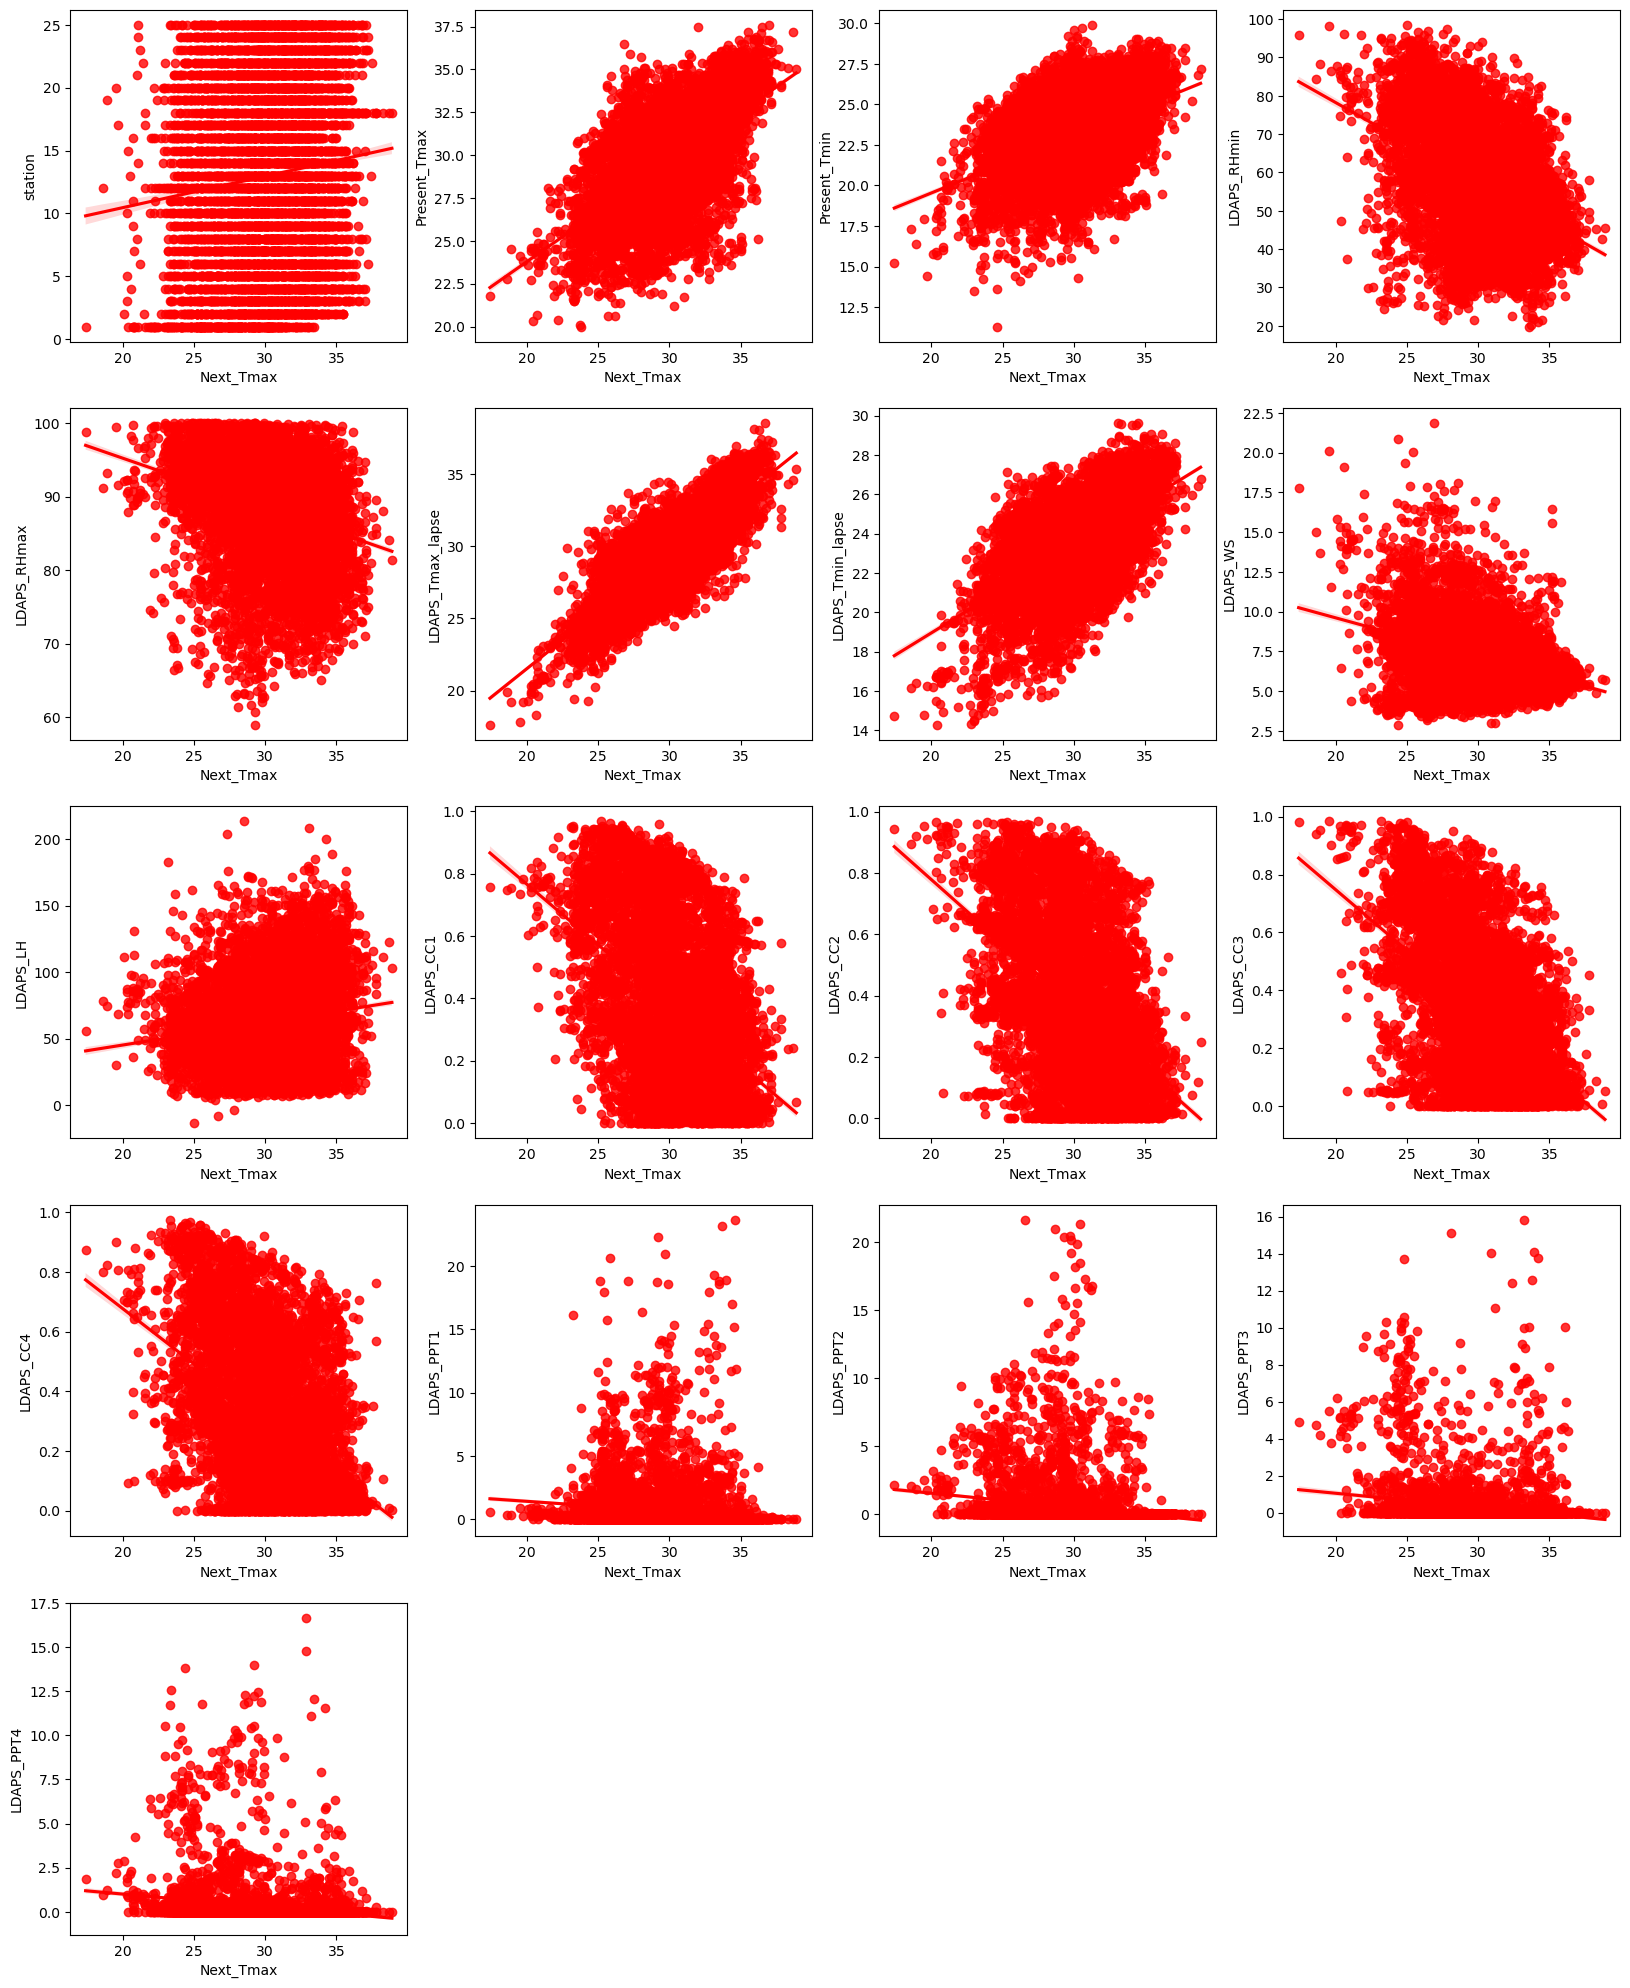

In [20]:
plt.figure(figsize = (20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x='Next_Tmax', y=i, data=df, color='r')
        plt.xlabel('Next_Tmax')
        plt.ylabel(i)
    p+=1
    
plt.show()

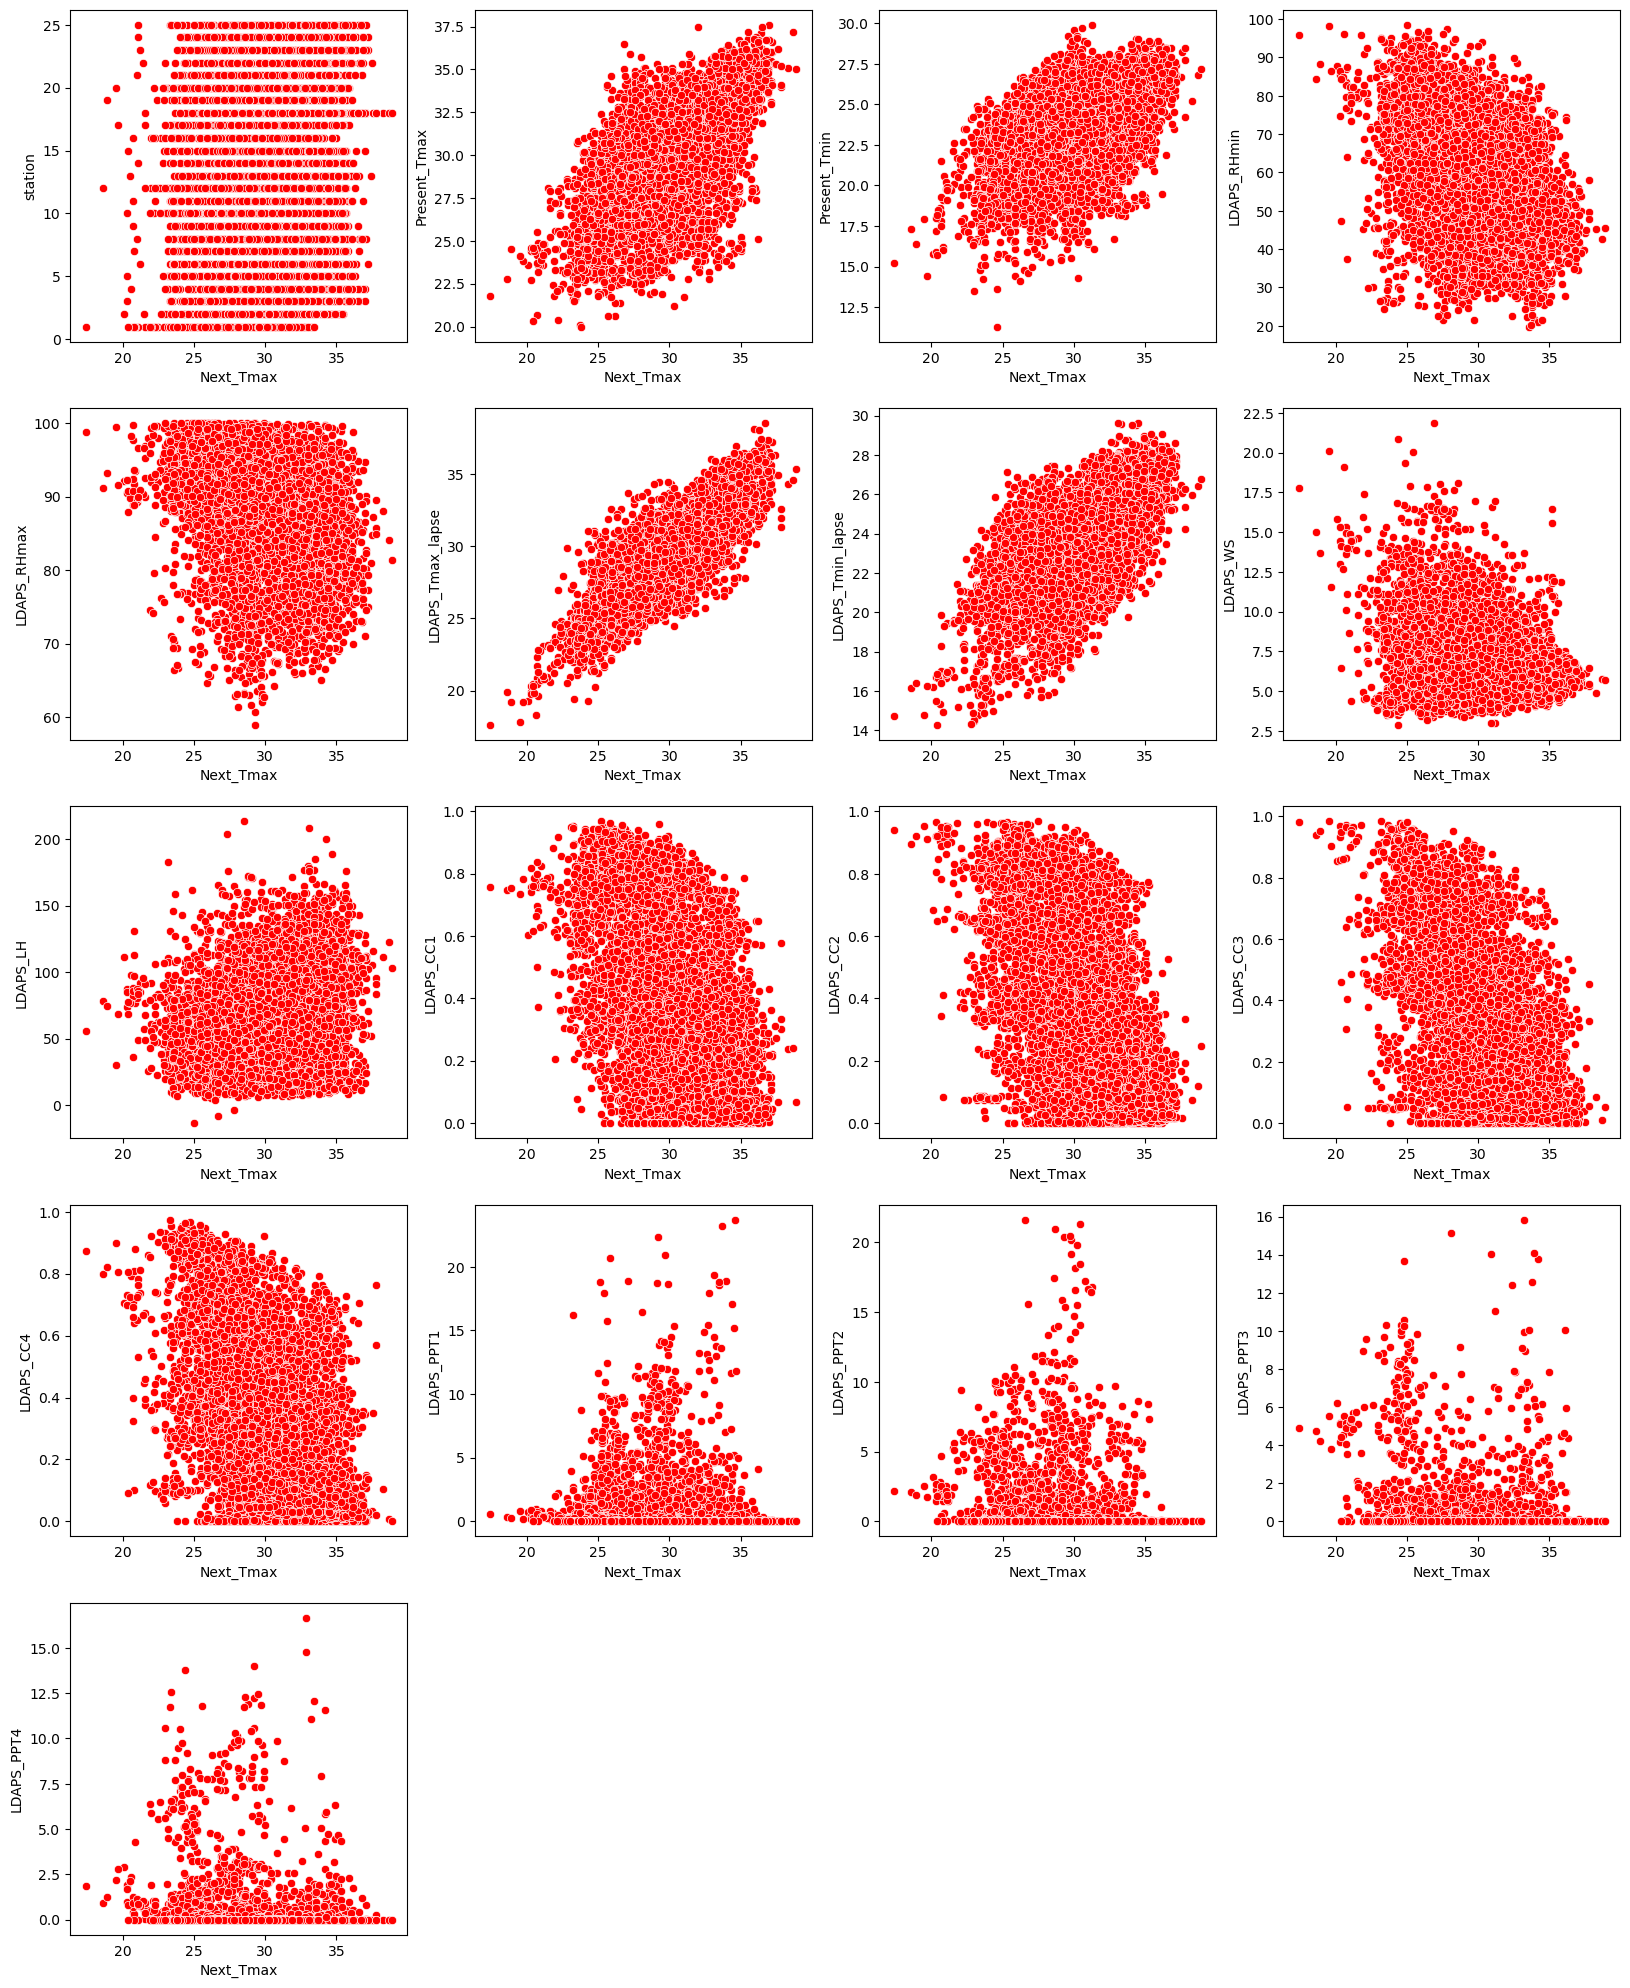

In [21]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x='Next_Tmax', y=i, data=df, color='r')
        plt.xlabel('Next_Tmax')
        plt.ylabel(i)
    p+=1
plt.show()

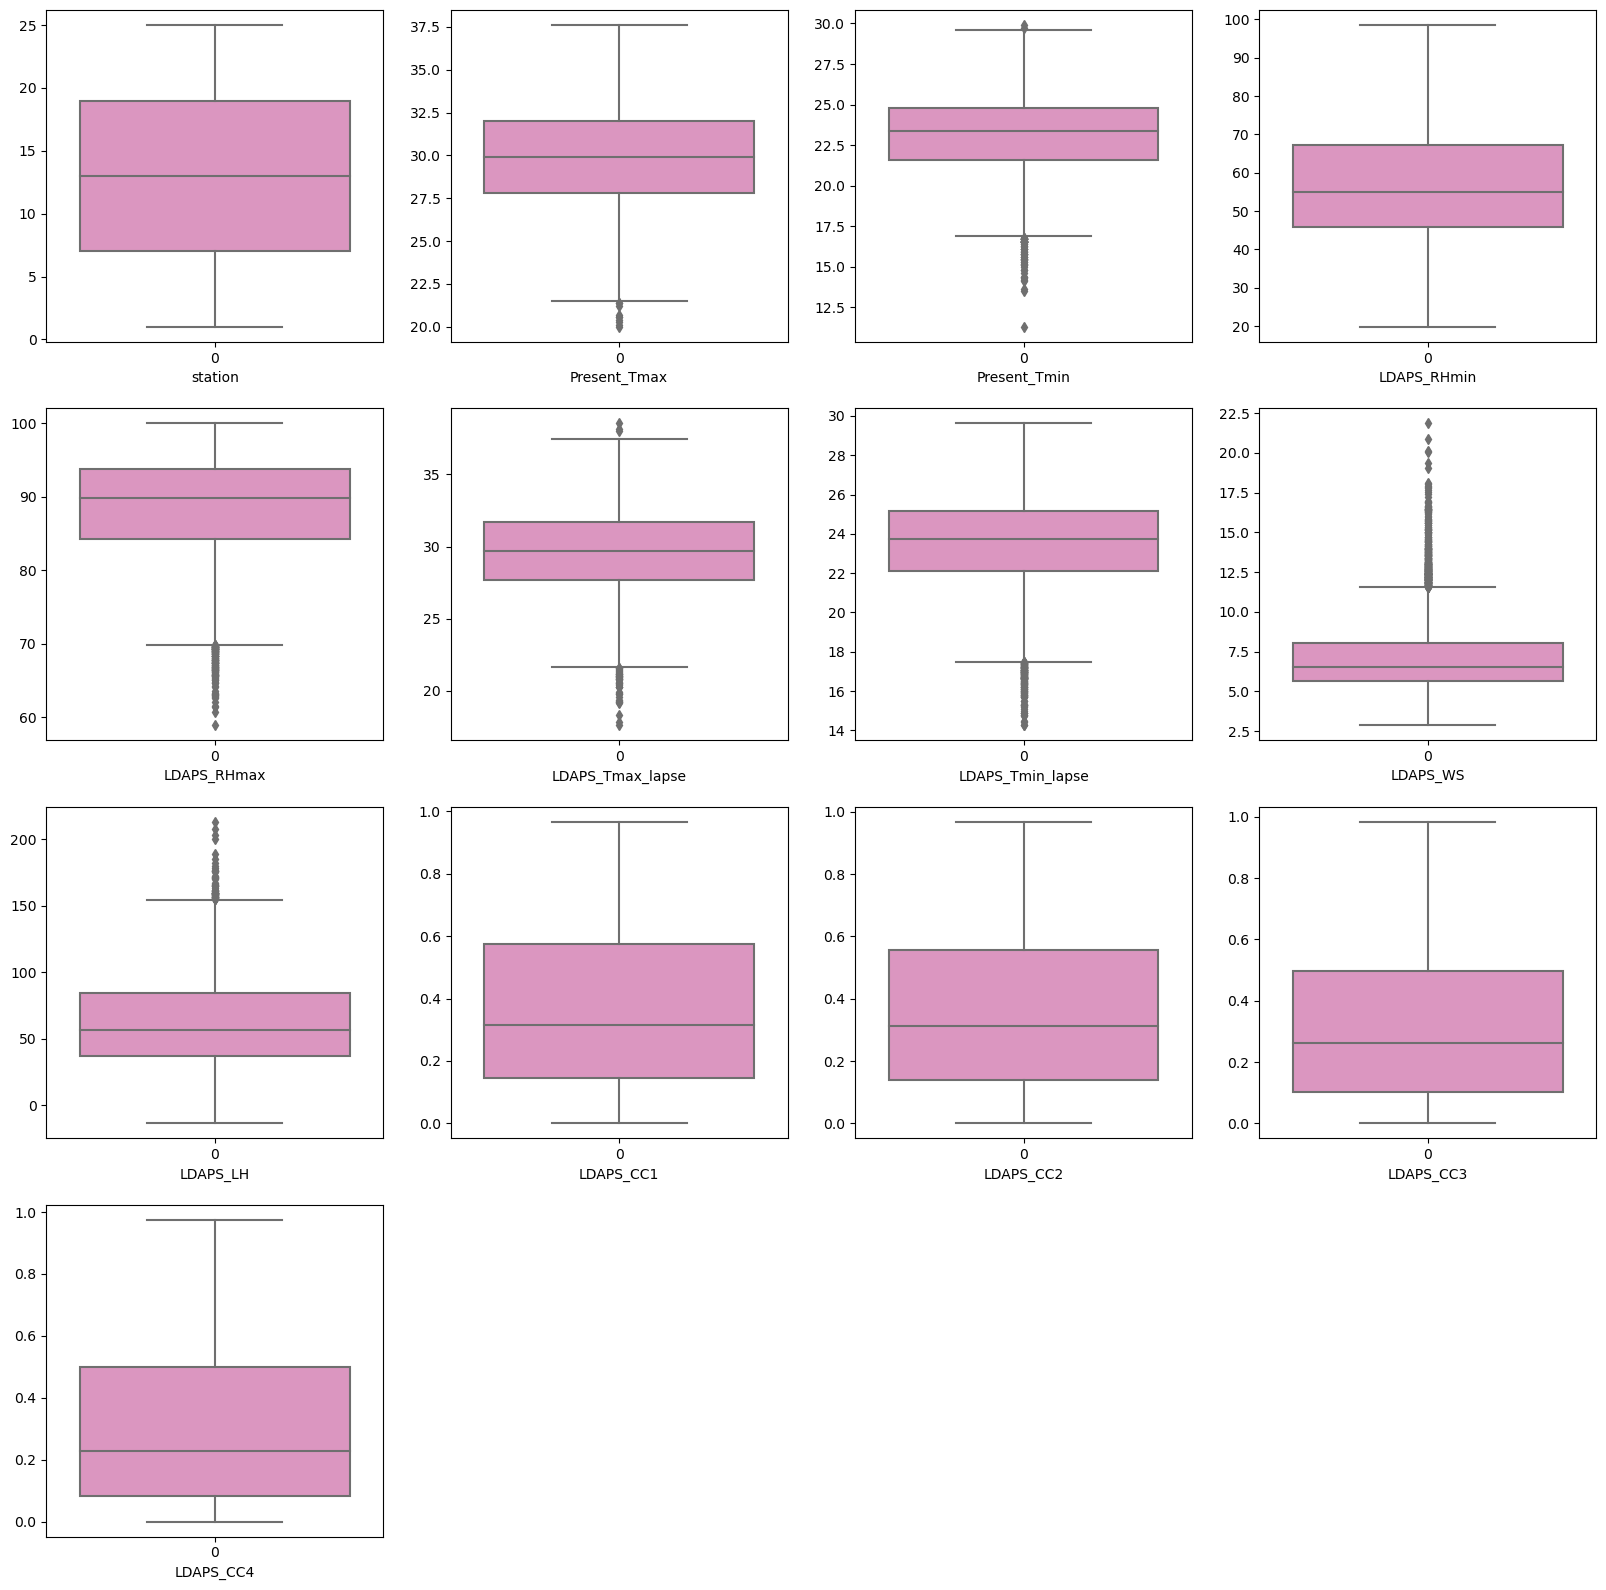

In [22]:
#Lets check the outliers by plotting boxplot

plt.figure(figsize = (20,25))
p=1
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i], palette = 'Set2_r')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [23]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [24]:
#Removing Skewness using Cuberoot method
df['LDAPS_PPT1'] = np.cbrt(df['LDAPS_PPT1'])

df['LDAPS_PPT2'] = np.cbrt(df['LDAPS_PPT2'])

df['LDAPS_RHmax'] = np.cbrt(df['LDAPS_RHmax'])

df['LDAPS_PPT3'] = np.cbrt(df['LDAPS_PPT3'])

df['LDAPS_PPT4'] = np.cbrt(df['LDAPS_PPT4'])

In [25]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.989682
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          1.955868
LDAPS_PPT2          2.267487
LDAPS_PPT3          2.575795
LDAPS_PPT4          2.837790
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
dtype: float64

In [26]:
#Checking the correlation between features and the target
cor = df.corr()
cor

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.113301      0.133282    -0.067846   
Present_Tmax      0.113301      1.000000      0.615208    -0.209059   
Present_Tmin      0.133282      0.615208      1.000000     0.122200   
LDAPS_RHmin      -0.067846     -0.209059      0.122200     1.000000   
LDAPS_RHmax      -0.167757     -0.300910     -0.014955     0.572235   
LDAPS_Tmax_lapse  0.069856      0.573777      0.467904    -0.569580   
LDAPS_Tmin_lapse  0.105277      0.628705      0.772061     0.085237   
LDAPS_WS          0.005822     -0.125952     -0.038779     0.289422   
LDAPS_LH         -0.132129      0.134246     -0.012817    -0.072195   
LDAPS_CC1         0.006539     -0.316333      0.084348     0.612831   
LDAPS_CC2         0.003526     -0.216976      0.090038     0.744774   
LDAPS_CC3        -0.000161     -0.146391     -0.004719     0.688069   
LDAPS_CC4         0.005005     -0.143069     -0.046694     0.513937   
LDAPS_PPT1       -0.004495     -0.186100      0.111354     0.425852   
LDAPS_PPT2       -0.010172     -0.151768      0.083054     0.576784   
LDAPS_PPT3       -0.018516     -0.137308     -0.029968     0.434807   
LDAPS_PPT4       -0.006713     -0.129598     -0.101194     0.298739   
lat              -0.239118     -0.054134     -0.081417     0.085027   
lon              -0.118845      0.007695     -0.045174    -0.077590   
DEM              -0.256706     -0.189439     -0.254084     0.100684   
Slope            -0.091721     -0.107079     -0.148423     0.122454   
Solar radiation  -0.021194     -0.022114      0.059765     0.242168   
Next_Tmax         0.107747      0.610357      0.463523    -0.446824   
Next_Tmin         0.128184      0.621048      0.796975     0.093249   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.167757          0.069856          0.105277  0.005822   
Present_Tmax        -0.300910          0.573777          0.628705 -0.125952   
Present_Tmin        -0.014955          0.467904          0.772061 -0.038779   
LDAPS_RHmin          0.572235         -0.569580          0.085237  0.289422   
LDAPS_RHmax          1.000000         -0.370402         -0.113376  0.125123   
LDAPS_Tmax_lapse    -0.370402          1.000000          0.653425 -0.316011   
LDAPS_Tmin_lapse    -0.113376          0.653425          1.000000 -0.134652   
LDAPS_WS             0.125123         -0.316011         -0.134652  1.000000   
LDAPS_LH             0.240616          0.043663         -0.139675  0.004427   
LDAPS_CC1            0.429502         -0.440878          0.008714  0.285349   
LDAPS_CC2            0.385113         -0.525380          0.046537  0.257226   
LDAPS_CC3            0.221635         -0.542728         -0.044998  0.238155   
LDAPS_CC4            0.124646         -0.429739         -0.079536  0.218870   
LDAPS_PPT1           0.401324         -0.252543          0.005396  0.254325   
LDAPS_PPT2           0.359932         -0.395032         -0.008397  0.261947   
LDAPS_PPT3           0.241423         -0.329153         -0.094258  0.215682   
LDAPS_PPT4           0.171265         -0.279445         -0.152636  0.250514   
lat                  0.188173         -0.044052         -0.099452  0.033025   
lon                  0.027135          0.091568         -0.024703 -0.063009   
DEM                  0.172573         -0.181433         -0.198396  0.188540   
Slope                0.213997         -0.163891         -0.187864  0.169223   
Solar radiation      0.141805          0.047414          0.157763  0.120630   
Next_Tmax           -0.282381          0.835729          0.592119 -0.351107   
Next_Tmin           -0.072059          0.589963          0.886513 -0.102021   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.132129   0.006539  ...   -0.010172   -0.018516   
Present_Tmax      0.134246  -0.316333  ...   -0.151768   -0.137308   
Present_Tmin     -0.012817   0.084348  ...    0.083054   

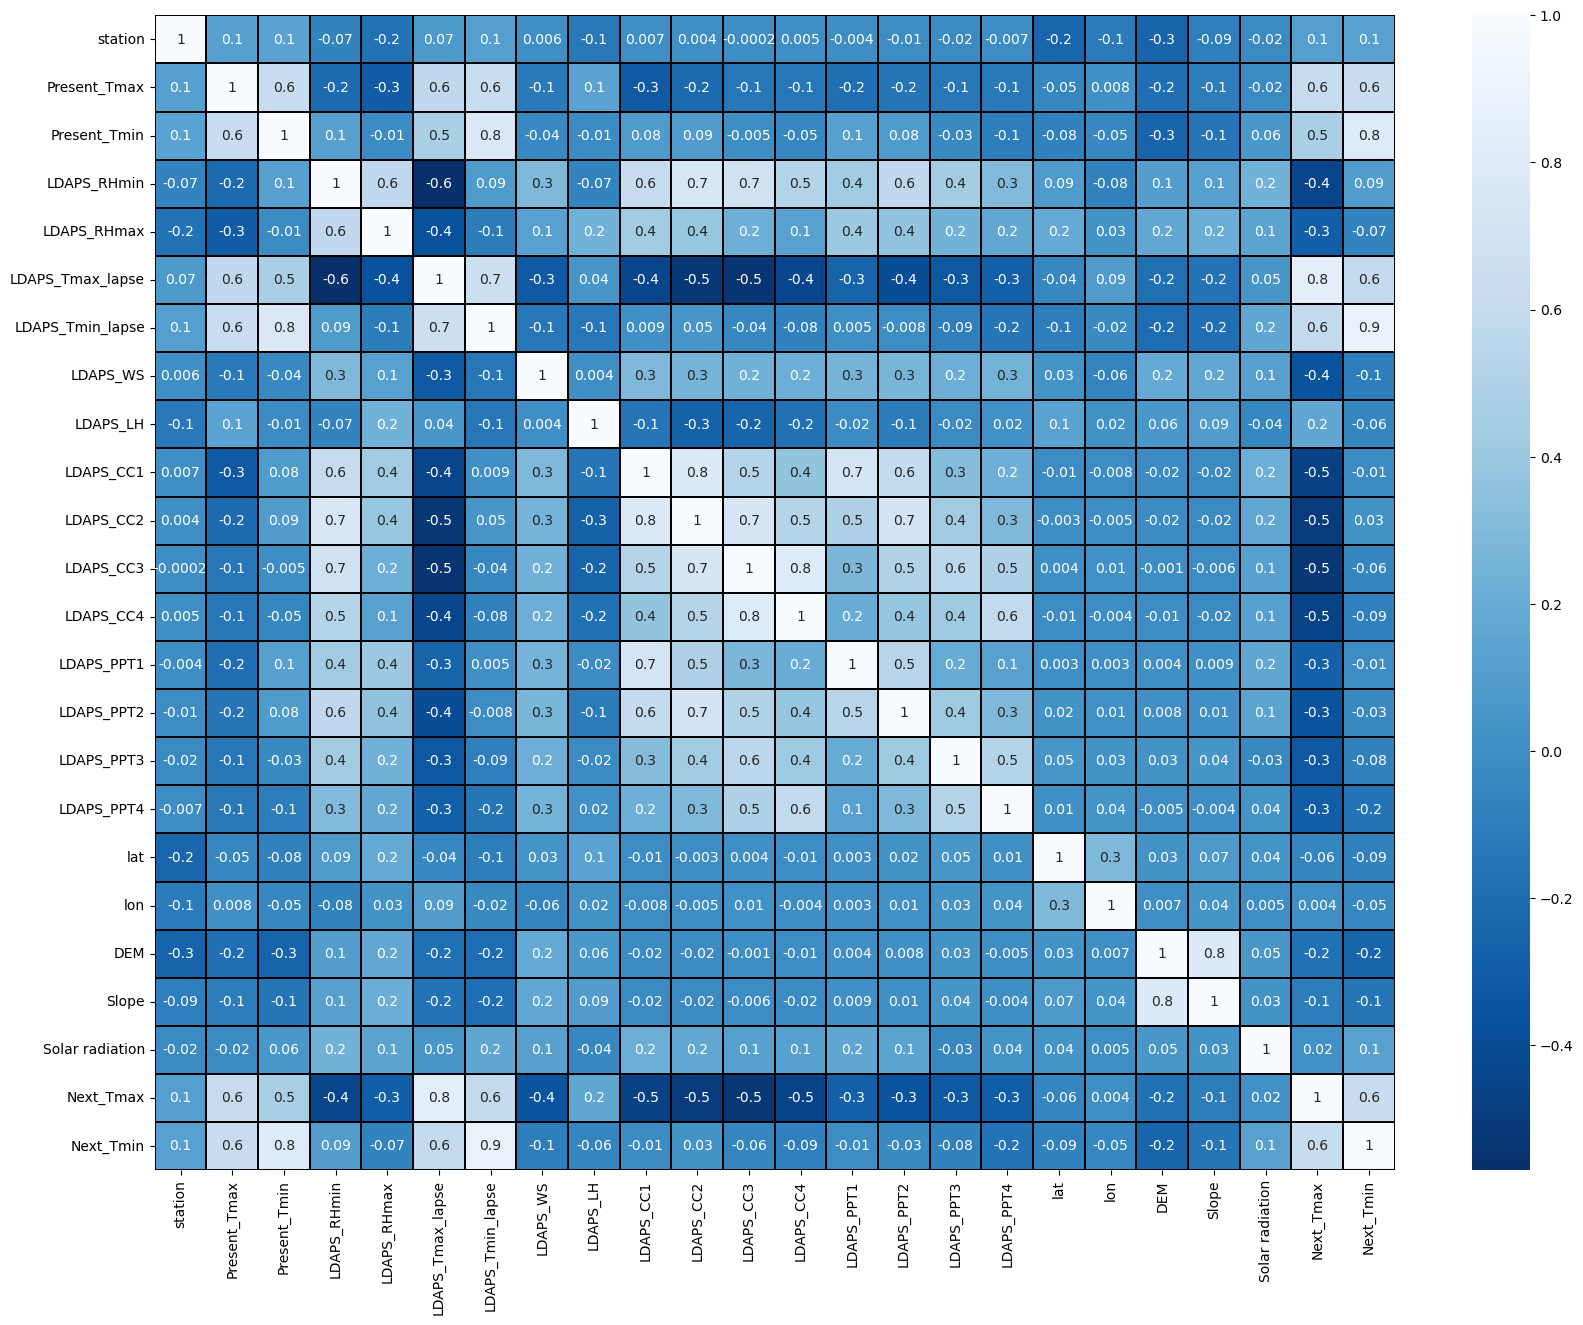

In [27]:
#Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), linewidths = 0.1, fmt = '.1g', linecolor = 'black', annot = True, cmap = 'Blues_r')
plt.yticks(rotation = 0);
plt.show()

In [28]:
cor['Next_Tmax'].sort_values(ascending = False)

Next_Tmax           1.000000
LDAPS_Tmax_lapse    0.835729
Next_Tmin           0.616629
Present_Tmax        0.610357
LDAPS_Tmin_lapse    0.592119
Present_Tmin        0.463523
LDAPS_LH            0.156779
station             0.107747
Solar radiation     0.016145
lon                 0.003502
lat                -0.055367
Slope              -0.104279
DEM                -0.174578
LDAPS_PPT1         -0.270856
LDAPS_RHmax        -0.282381
LDAPS_PPT4         -0.293569
LDAPS_PPT3         -0.320144
LDAPS_PPT2         -0.349398
LDAPS_WS           -0.351107
LDAPS_RHmin        -0.446824
LDAPS_CC4          -0.454039
LDAPS_CC1          -0.459705
LDAPS_CC2          -0.498295
LDAPS_CC3          -0.523061
Name: Next_Tmax, dtype: float64

In [29]:
#Seperate features and label
x = df.drop("Next_Tmax", axis=1)
y = df["Next_Tmax"]

In [30]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664607     -0.353318     -0.748029     0.104660     0.396101   
1    -1.526052      0.725138     -0.664721    -0.305052     0.328258   
2    -1.387498      0.624033      0.043400    -0.549344    -0.575076   
3    -1.248943      0.758840      0.085054     0.103573     1.092951   
4    -1.110389      0.556630     -0.539758    -0.037665     0.268432   
...        ...           ...           ...          ...          ...   
7583  1.106481     -2.240616     -2.247578    -2.190405    -1.392182   
7584  1.245036     -2.442826     -2.414195    -1.820788    -0.614750   
7585  1.383590     -2.173212     -2.539157    -2.050081    -1.303288   
7586  1.522145     -2.173212     -2.289232    -2.234735    -1.534320   
7587  1.660699     -2.206914     -2.414195    -2.310467    -1.541888   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.525269         -0.215525 -0.126423  0.206603  -0.513123  ...   
1             0.078334          0.223368 -0.644133 -0.313359  -0.545304  ...   
2             0.160080          0.449896 -0.439100 -1.244497  -0.606944  ...   
3             0.028710         -0.079238 -0.663353  0.096026  -0.580143  ...   
4            -0.171981         -0.010803 -0.624327  1.349989  -0.827872  ...   
...                ...               ...       ...       ...        ...  ...   
7583         -0.614083         -2.223667 -0.225479 -1.569844  -1.203497  ...   
7584         -0.990460         -2.432415 -0.609132  0.583486  -1.151793  ...   
7585         -1.110333         -2.021883 -0.434188  0.283984  -1.290699  ...   
7586         -0.886737         -2.039881 -0.253241 -0.452772  -1.268430  ...   
7587         -0.570995         -2.129768  0.089654 -1.585402  -1.218554  ...   

      LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat       lon  \
0      -0.559482   -0.509339   -0.483908   -0.430019  1.186076 -0.005302   
1      -0.559482   -0.509339   -0.483908   -0.430019  1.186076  0.512280   
2      -0.559482   -0.509339   -0.483908   -0.430019  0.650626  0.840503   
3      -0.559482   -0.509339   -0.483908   -0.430019  1.987268  0.386040   
4      -0.559482   -0.509339   -0.483908   -0.430019  0.117159  1.812547   
...          ...         ...         ...         ...       ...       ...   
7583   -0.559482   -0.509339   -0.483908   -0.430019  0.117159  0.613271   
7584   -0.559482   -0.509339   -0.483908   -0.430019 -0.686016  1.193973   
7585   -0.559482   -0.509339   -0.483908   -0.430019 -0.150566 -1.267697   
7586   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -1.040466   
7587   -0.559482   -0.509339   -0.483908   -0.430019 -0.418291 -0.270405   

           DEM     Slope  Solar radiation  Next_Tmin  
0     2.769091  1.111162         1.510565  -0.689265  
1    -0.315828 -0.543220         1.222997  -0.165513  
2    -0.526719 -0.723891         1.209602   0.398527  
3    -0.298272  0.928888         1.194265   0.559681  
4    -0.494848 -0.549485         1.200286  -0.165513  
...        ...       ...              ...        ...  
7583 -0.655747 -0.500966        -2.065599  -2.099366  
7584 -0.735482 -0.820711        -2.098689  -2.341098  
7585 -0.852919 -0.804538        -2.095175  -1.938212  
7586 -0.821476 -0.755800        -2.106671  -1.656192  
7587 -0.779341 -0.720103        -2.076487  -2.220232  

[7588 rows x 23 columns]

In [31]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns

In [32]:
vif

VIF values          Features
0     1.231288           station
1     2.848330      Present_Tmax
2     3.486645      Present_Tmin
3     6.565878       LDAPS_RHmin
4     2.214457       LDAPS_RHmax
5     7.810272  LDAPS_Tmax_lapse
6     9.696563  LDAPS_Tmin_lapse
7     1.306293          LDAPS_WS
8     1.536931          LDAPS_LH
9     4.856658         LDAPS_CC1
10    5.979676         LDAPS_CC2
11    5.708282         LDAPS_CC3
12    3.400297         LDAPS_CC4
13    2.532394        LDAPS_PPT1
14    2.421755        LDAPS_PPT2
15    1.865645        LDAPS_PPT3
16    1.960503        LDAPS_PPT4
17    1.234825               lat
18    1.174452               lon
19    3.360939               DEM
20    3.103334             Slope
21    1.246968   Solar radiation
22    6.166449         Next_Tmin

In [33]:
x.drop("LDAPS_Tmax_lapse", axis=1, inplace=True)

In [34]:
#Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

VIF values          Features
0     1.228942           station
1     2.835001      Present_Tmax
2     3.486010      Present_Tmin
3     4.299594       LDAPS_RHmin
4     2.210815       LDAPS_RHmax
5     6.358018  LDAPS_Tmin_lapse
6     1.284409          LDAPS_WS
7     1.528640          LDAPS_LH
8     4.778991         LDAPS_CC1
9     5.881452         LDAPS_CC2
10    5.638377         LDAPS_CC3
11    3.400289         LDAPS_CC4
12    2.479340        LDAPS_PPT1
13    2.419848        LDAPS_PPT2
14    1.839803        LDAPS_PPT3
15    1.941402        LDAPS_PPT4
16    1.224135               lat
17    1.157154               lon
18    3.355735               DEM
19    3.091897             Slope
20    1.165668   Solar radiation
21    6.093712         Next_Tmin

In [35]:
#importing necessary libraries:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [36]:
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

Best accuracy is 0.7787715642446793 at random_state 10


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=maxRS)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge

In [39]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train = LR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_LR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score:  0.7787715642446793
R2_score on training Data: 74.93632088656045
Mean Absolute Error: 1.139075052203397
Mean Squared Error: 2.151899068671093
Root mean squared error: 1.4669352639673958


In [41]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train = RFR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_RFR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score:  0.909438612464878
R2_score on training Data: 98.64854728774121
Mean Absolute Error: 0.6924839701361438
Mean Squared Error: 0.880894740447958
Root mean squared error: 0.9385599290657779


In [42]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_knn))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score:  0.8471786782092972
R2_score on training Data: 89.70853302416019
Mean Absolute Error: 0.9106104523495828
Mean Squared Error: 1.486499956082565
Root mean squared error: 1.219221044799738


In [43]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train = GBR.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_GBR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score:  0.845226035760072
R2_score on training Data: 86.02686089748077
Mean Absolute Error: 0.949537516625244
Mean Squared Error: 1.5054933981036556
Root mean squared error: 1.2269854922140098


In [44]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_lasso))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score:  0.4772408660803076
R2_score on training Data: 46.57977852108688
Mean Absolute Error: 1.8438523486477563
Mean Squared Error: 5.084901900519079
Root mean squared error: 2.2549727050496817


In [45]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_rd))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score:  0.7787620042817431
R2_score on training Data: 74.936317500289
Mean Absolute Error: 1.1390724606074862
Mean Squared Error: 2.1519920588659054
Root mean squared error: 1.4669669590232444


In [46]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_dtr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score:  0.7793501221325823
R2_score on training Data: 100.0
Mean Absolute Error: 1.0450592885375494
Mean Squared Error: 2.1462714097496707
Root mean squared error: 1.46501583941938


In [51]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_svr))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score:  0.8666906835022093
R2_score on training Data: 88.65411137654142
Mean Absolute Error: 0.8414710414507479
Mean Squared Error: 1.2967057920802398
Root mean squared error: 1.1387299030412084


In [48]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train, y_train)
pred_ETR = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2_score: ', r2_score(y_test, pred_ETR))
print('R2_score on training Data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_ETR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_ETR))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred_ETR)))

R2_score:  0.9281222204950086
R2_score on training Data: 99.99999996492491
Mean Absolute Error: 0.6213706631532719
Mean Squared Error: 0.6991584343434344
Root mean squared error: 0.8361569436077383


In [49]:
from sklearn.model_selection import cross_val_score

In [50]:
score = cross_val_score(LR, x, y, cv=5, scoring = 'r2')
print(score)
print(score.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_LR) - score.mean())*100)

[0.71650135 0.59857548 0.61906498 0.81640879 0.71796629]
<built-in method mean of numpy.ndarray object at 0x0000024251F7FE70>
Difference between R2 score and cross validation score is - 8.506818693899499


In [52]:
score1 = cross_val_score(RFR, x, y, cv=5, scoring = 'r2')
print(score1)
print(score1.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_RFR) - score1.mean())*100)

[0.63773601 0.52986421 0.54122842 0.75869605 0.63699274]
<built-in method mean of numpy.ndarray object at 0x0000024251F7FB70>
Difference between R2 score and cross validation score is - 28.853512612001797


In [53]:
score2 = cross_val_score(knn, x, y, cv=5, scoring = 'r2')
print(score2)
print(score2.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_knn) - score2.mean())*100)

[0.61927287 0.41034183 0.44616473 0.66920782 0.62610433]
<built-in method mean of numpy.ndarray object at 0x0000024251F7FA50>
Difference between R2 score and cross validation score is - 29.296036010657968


In [54]:
score3 = cross_val_score(GBR, x, y, cv=5, scoring = 'r2')
print(score3)
print(score3.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_GBR) - score3.mean())*100)

[0.65106044 0.57860068 0.5652423  0.80556892 0.6667927 ]
<built-in method mean of numpy.ndarray object at 0x0000024251F7F510>
Difference between R2 score and cross validation score is - 19.17730279787748


In [55]:
score4 = cross_val_score(lasso, x, y, cv=5, scoring = 'r2')
print(score4)
print(score4.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_lasso) - score4.mean())*100)

[0.41462179 0.33703612 0.40791792 0.30440665 0.44912691]
<built-in method mean of numpy.ndarray object at 0x0000024251F7FDB0>
Difference between R2 score and cross validation score is - 9.461898621179055


In [56]:
score5 = cross_val_score(rd, x, y, cv=5, scoring = 'r2')
print(score5)
print(score5.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_rd) - score5.mean())*100)

[0.71654527 0.59857017 0.6190965  0.81643494 0.71795403]
<built-in method mean of numpy.ndarray object at 0x0000024251F7FAB0>
Difference between R2 score and cross validation score is - 8.50418219691641


In [57]:
score6 = cross_val_score(svr, x, y, cv=5, scoring = 'r2')
print(score6)
print(score6.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_svr) - score6.mean())*100)

[0.71703267 0.5681944  0.62037835 0.79475215 0.7143629 ]
<built-in method mean of numpy.ndarray object at 0x0000024251F7F330>
Difference between R2 score and cross validation score is - 18.374658976863934


In [58]:
score7 = cross_val_score(etr, x, y, cv=5, scoring = 'r2')
print(score7)
print(score7.mean)
print('Difference between R2 score and cross validation score is -', (r2_score(y_test, pred_ETR) - score7.mean())*100)

[0.64372678 0.548025   0.57123126 0.80574175 0.66240464]
<built-in method mean of numpy.ndarray object at 0x0000024251F7F570>
Difference between R2 score and cross validation score is - 28.189633458287787


In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}

In [61]:
# Create a based model
RFR = RandomForestRegressor()

In [62]:
# Instantiate the grid search model
GCV = GridSearchCV(estimator = RFR, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [63]:
GCV.fit(x_train, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [64]:
GCV.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [65]:
Model = RandomForestRegressor(bootstrap = True, max_depth=80, max_features=3, min_samples_leaf=3, 
                              min_samples_split=8, n_estimators=300)

In [66]:
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score: ', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score:  0.8872498815927943
Mean Absolute Error: 0.7935240201890008
Mean Squared Error: 1.0967255360489354
Root mean squared error: 1.0472466452793894


In [67]:
#Saving the model using .pk1
import joblib
joblib.dump(Model, "TemperatureForecastProject_Regression2.pk1")

['TemperatureForecastProject_Regression2.pk1']

In [68]:
#Lets load the saved model and get the predictions
model = joblib.load('TemperatureForecastProject_Regression2.pk1')

#Prediction
prediction = model.predict(x_test)
prediction

array([34.0024071 , 35.53629184, 29.61671031, ..., 31.37169839,
       28.14436445, 30.88518032])

In [69]:
a = np.array(y_test)
df=pd.DataFrame()
df['Predicted'] = prediction
df['Original'] = a
df

Predicted  Original
0     34.002407      34.9
1     35.536292      35.9
2     29.616710      29.4
3     27.014237      26.8
4     26.264150      25.3
...         ...       ...
2272  29.168685      29.1
2273  30.176977      29.7
2274  31.371698      31.1
2275  28.144364      27.6
2276  30.885180      29.9

[2277 rows x 2 columns]